In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Conv2DTranspose, BatchNormalization, UpSampling2D, Dense, MaxPool2D, LeakyReLU, Reshape, Dropout, Flatten, GaussianNoise, Embedding, multiply, concatenate, add
from tensorflow.keras.losses import BinaryCrossentropy, SparseCategoricalCrossentropy, CategoricalCrossentropy, MeanSquaredError
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.backend as K
import tensorflow as tf

import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import time
import pickle

In [3]:
def normalize_img(img):
    return (img - 127.5)/127.5

def unnormalize_img(img):
    return (img + 1.) / 2.

In [4]:
def load_image_caption_dict():
    caption_dict = None
    with open('./bert/embeddedcaptions.pickle', 'rb') as f:
        return pickle.load(f)
    
caption_dict = load_image_caption_dict()

In [5]:
train_imgs = []
train_classes = []
train_captions = []
class_index = 0
import os
for root, dirs, files in os.walk("./CUB_200_2011/CUB_200_2011/images-cleaned-named/", topdown=False):
    print(f'{len(files)} samples in class {class_index}, ({root})')
    for name in files:
        train_imgs.append(cv2.cvtColor(cv2.imread(os.path.join(root, name)), cv2.COLOR_RGB2BGR))
        train_classes.append(class_index)
        train_captions.append(caption_dict[name.split('.')[0]+'.txt'][0]) # Just using the first of 10 captions for now
    class_index += 1
train_imgs = np.array(train_imgs)
train_imgs = (train_imgs - 127.5)/127.5
train_imgs = train_imgs.astype(np.float32)
train_classes = np.array(train_classes)
train_captions = np.array(train_captions)

60 samples in class 0, (./CUB_200_2011/CUB_200_2011/images-cleaned-named/001.Black_footed_Albatross)
60 samples in class 1, (./CUB_200_2011/CUB_200_2011/images-cleaned-named/002.Laysan_Albatross)
58 samples in class 2, (./CUB_200_2011/CUB_200_2011/images-cleaned-named/003.Sooty_Albatross)
60 samples in class 3, (./CUB_200_2011/CUB_200_2011/images-cleaned-named/004.Groove_billed_Ani)
44 samples in class 4, (./CUB_200_2011/CUB_200_2011/images-cleaned-named/005.Crested_Auklet)
41 samples in class 5, (./CUB_200_2011/CUB_200_2011/images-cleaned-named/006.Least_Auklet)
53 samples in class 6, (./CUB_200_2011/CUB_200_2011/images-cleaned-named/007.Parakeet_Auklet)
48 samples in class 7, (./CUB_200_2011/CUB_200_2011/images-cleaned-named/008.Rhinoceros_Auklet)
59 samples in class 8, (./CUB_200_2011/CUB_200_2011/images-cleaned-named/009.Brewer_Blackbird)
60 samples in class 9, (./CUB_200_2011/CUB_200_2011/images-cleaned-named/010.Red_winged_Blackbird)
60 samples in class 10, (./CUB_200_2011/CUB_20

60 samples in class 89, (./CUB_200_2011/CUB_200_2011/images-cleaned-named/090.Red_breasted_Merganser)
60 samples in class 90, (./CUB_200_2011/CUB_200_2011/images-cleaned-named/091.Mockingbird)
60 samples in class 91, (./CUB_200_2011/CUB_200_2011/images-cleaned-named/092.Nighthawk)
60 samples in class 92, (./CUB_200_2011/CUB_200_2011/images-cleaned-named/093.Clark_Nutcracker)
60 samples in class 93, (./CUB_200_2011/CUB_200_2011/images-cleaned-named/094.White_breasted_Nuthatch)
60 samples in class 94, (./CUB_200_2011/CUB_200_2011/images-cleaned-named/095.Baltimore_Oriole)
60 samples in class 95, (./CUB_200_2011/CUB_200_2011/images-cleaned-named/096.Hooded_Oriole)
59 samples in class 96, (./CUB_200_2011/CUB_200_2011/images-cleaned-named/097.Orchard_Oriole)
60 samples in class 97, (./CUB_200_2011/CUB_200_2011/images-cleaned-named/098.Scott_Oriole)
60 samples in class 98, (./CUB_200_2011/CUB_200_2011/images-cleaned-named/099.Ovenbird)
60 samples in class 99, (./CUB_200_2011/CUB_200_2011/ima

56 samples in class 177, (./CUB_200_2011/CUB_200_2011/images-cleaned-named/178.Swainson_Warbler)
59 samples in class 178, (./CUB_200_2011/CUB_200_2011/images-cleaned-named/179.Tennessee_Warbler)
60 samples in class 179, (./CUB_200_2011/CUB_200_2011/images-cleaned-named/180.Wilson_Warbler)
59 samples in class 180, (./CUB_200_2011/CUB_200_2011/images-cleaned-named/181.Worm_eating_Warbler)
60 samples in class 181, (./CUB_200_2011/CUB_200_2011/images-cleaned-named/182.Yellow_Warbler)
60 samples in class 182, (./CUB_200_2011/CUB_200_2011/images-cleaned-named/183.Northern_Waterthrush)
60 samples in class 183, (./CUB_200_2011/CUB_200_2011/images-cleaned-named/184.Louisiana_Waterthrush)
60 samples in class 184, (./CUB_200_2011/CUB_200_2011/images-cleaned-named/185.Bohemian_Waxwing)
60 samples in class 185, (./CUB_200_2011/CUB_200_2011/images-cleaned-named/186.Cedar_Waxwing)
50 samples in class 186, (./CUB_200_2011/CUB_200_2011/images-cleaned-named/187.American_Three_toed_Woodpecker)
60 samples

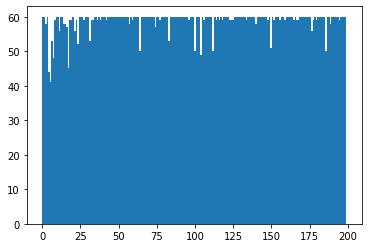

(11788, 64, 64, 3)


In [6]:
plt.hist(train_classes, bins=200)
plt.show()
assert(len(train_imgs) == len(train_classes))
print(train_imgs.shape)

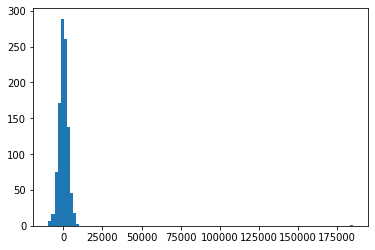

929
18.448483


In [7]:
plt.hist(np.sum(train_captions, axis=0), bins=100)
plt.show()
print(np.argmax(np.sum(train_captions, axis=0)))
print(train_captions[2786][929])

In [8]:
def create_simple_attrs(attrs):
    # Structure is like so: [0-14:color, 15-19:size, 20-33:shape]

    simple_attrs = np.zeros((attrs.shape[0], 34))
    
    # Color
    simple_attrs[:, 0:15] = attrs[:, 248:263]
    
    # Size and shape
    simple_attrs[:, 15:34] = attrs[:, 217:236]
    
    return simple_attrs


In [9]:
def create_even_simpler_attrs(attrs):
    # Structure is like so: [0-4:color, 5-7:size, 8-9:shape]
    
    simplest_attrs = np.zeros((attrs.shape[0], 10))
    
    simplest_attrs[:, 0] = attrs[:, 1] # Brown
    simplest_attrs[:, 1] = attrs[:, 5] # Grey
    simplest_attrs[:, 2] = attrs[:, 11] # Black
    simplest_attrs[:, 3] = attrs[:, 12] # White
    simplest_attrs[:, 4] = np.clip(np.sum(attrs[:, [0, 2, 3, 4, 6, 7, 8, 9, 10, 13, 14]], axis=1), a_min=0, a_max=1) # Other
    
    simplest_attrs[:, 5] = attrs[:, 19] # Smallest
    simplest_attrs[:, 6] = attrs[:, 16] # Small
    simplest_attrs[:, 7] = np.clip(np.sum(attrs[:, [15, 17, 18]], axis=1), a_min=0, a_max=1) # Large
    
    simplest_attrs[:, 8] = attrs[:, 33] # Perching-like
    simplest_attrs[:, 9] = np.clip(np.sum(attrs[:, [20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]], axis=1), a_min=0, a_max=1) # Not perching-like
    
    return simplest_attrs

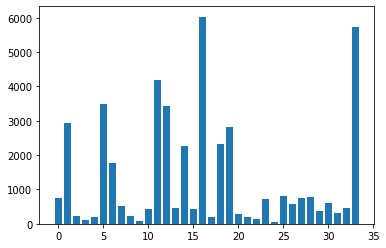

In [10]:
def load_image_attributes():
    train_attrs = np.zeros((train_imgs.shape[0], 312))
    with open('./CUB_200_2011/CUB_200_2011/attributes/image_attribute_labels.txt', 'r') as f:
        lines = f.readlines()
        for line in lines:
            
            # For now we don't care about attribute certainty, just if it is present.
            try:
                split = line.split()
                img_id = int(split[0])
                assert(img_id > 0)
                assert(img_id <= 11788)
                attr_id = int(split[1])
                assert(attr_id > 0)
                assert(attr_id <= 312)
                is_present = int(split[2])
                assert(is_present == 0 or is_present == 1)
            except: 
                print(line)
                print(line.split())
                return
            
            train_attrs[img_id-1, attr_id-1] = is_present
    return train_attrs

train_attrs = load_image_attributes().astype('float32')
train_attrs = create_simple_attrs(train_attrs)
plt.bar([x for x in range(34)], np.sum(train_attrs, axis=0))
plt.show()
train_attrs = create_even_simpler_attrs(train_attrs)
train_attrs = train_attrs.astype(np.float32)

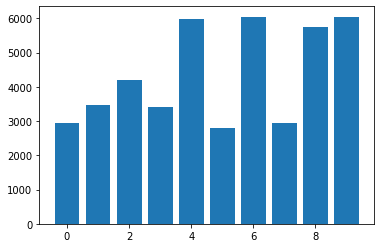

4358.4
1349.5349


In [11]:
plt.bar([x for x in range(10)], np.sum(train_attrs, axis=0))
plt.show()
sum_attrs = np.sum(train_attrs, axis=0)

print(np.mean(sum_attrs))
print(np.std(sum_attrs))
# np.argmin(sum_attrs)

In [12]:
def make_generator_model(shape):
    
    noise_in = Input(shape=shape)
    captions_in = Input(shape=(1024,))
    
    c = Dense(128)(captions_in)
    c = LeakyReLU()(c)
    
    c = Dense(10, activation='sigmoid')(c)
    
    # Possibly add a loss here between c and attrs
    
    input_layer = concatenate([noise_in, c])
    
    x = Dense(16*16*64*2)(input_layer)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)
    
    x = Reshape((16, 16, 128))(x)
    
    x = GaussianNoise(1)(x)
    x = Conv2DTranspose(128, (5, 5), strides=(2, 2), padding='same', use_bias=False)(x)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)
    
    x = GaussianNoise(1)(x)
    x = Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False)(x)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)
    
    x = GaussianNoise(1)(x)
    x = Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False)(x)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)
    
    x = GaussianNoise(1)(x)
    x = Conv2DTranspose(64, (5, 5), strides=(1, 1), padding='same', use_bias=False)(x)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)
    
    x = Conv2DTranspose(3, (5, 5), strides=(1, 1), padding='same', use_bias=False, activation='tanh')(x)
    
    return Model([noise_in, captions_in], x)

In [13]:
generator = make_generator_model((300,))
generator.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 1024)]       0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 128)          131200      input_2[0][0]                    
__________________________________________________________________________________________________
leaky_re_lu (LeakyReLU)         (None, 128)          0           dense[0][0]                      
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 300)]        0                                            
______________________________________________________________________________________________

(1024,)


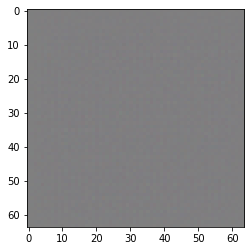

In [14]:
generator = make_generator_model((300,))

noise = np.random.normal(0, 1, 300)
label = train_captions[0]
print(label.shape)

generated_image = generator.predict( [np.array([noise]), np.array([label])] )[0]
plt.imshow(unnormalize_img(generated_image), )

In [15]:
def make_valid_discriminator_model():
    input_layer = Input((64, 64, 3))
#     x = GaussianNoise(1)(input_layer)
    
    x = Conv2D(64, (3, 3), strides=(2, 2), padding='same', name='valid')(input_layer)
    x = LeakyReLU()(x)
    x = Dropout(0.3)(x)
    x = Conv2D(64, (3, 3), strides=(1, 1), padding='same')(x)
    x = LeakyReLU()(x)
    x = Dropout(0.3)(x)

    
    x = Conv2D(128, (3, 3), strides=(2, 2), padding='same')(x)
    x = LeakyReLU()(x)
    x = Dropout(0.3)(x)
    x = Conv2D(128, (3, 3), strides=(1, 1), padding='same')(x)
    x = LeakyReLU()(x)
    x = Dropout(0.3)(x)
    
    
    x = Flatten()(x)
    x = Dense(64)(x) 
    x = LeakyReLU()(x)
    x = Dropout(0.3)(x)
    
    valid = Dense(1, activation='sigmoid')(x)
    
    return Model(input_layer, valid)

In [16]:
discriminator_valid = make_valid_discriminator_model()
discriminator_valid.summary()
valid = discriminator_valid.predict(np.array([generated_image]))


Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
valid (Conv2D)               (None, 32, 32, 64)        1792      
_________________________________________________________________
leaky_re_lu_12 (LeakyReLU)   (None, 32, 32, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 64)        36928     
_________________________________________________________________
leaky_re_lu_13 (LeakyReLU)   (None, 32, 32, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 64)        0   

In [17]:
def make_attr_discriminator_model():
    input_layer = Input((64, 64, 3))
    
#     x = GaussianNoise(1)(input_layer)
    
    x = Conv2D(64, (3, 3), strides=(2, 2), padding='same', name='attr')(input_layer)
    x = LeakyReLU()(x)
#     x = Dropout(0.3)(x)
    x = Conv2D(64, (3, 3), strides=(1, 1), padding='same')(x)
    x = LeakyReLU()(x)
#     x = Dropout(0.3)(x)

    
    x = Conv2D(128, (3, 3), strides=(2, 2), padding='same')(x)
    x = LeakyReLU()(x)
#     x = Dropout(0.3)(x)
    x = Conv2D(128, (3, 3), strides=(1, 1), padding='same')(x)
    x = LeakyReLU()(x)
#     x = Dropout(0.3)(x)


#     x = Conv2D(128, (3, 3), strides=(2, 2), padding='same')(x)
#     x = LeakyReLU()(x)
#     x = Dropout(0.3)(x)
#     x = Conv2D(128, (3, 3), strides=(1, 1), padding='same')(x)
#     x = LeakyReLU()(x)
#     x = Dropout(0.3)(x)
    
#     x = Conv2D(256, (3, 3), strides=(2, 2), padding='same')(x)
#     x = LeakyReLU()(x)
#     x = Dropout(0.3)(x)
#     x = Conv2D(256, (3, 3), strides=(1, 1), padding='same')(x)
#     x = LeakyReLU()(x)
#     x = Dropout(0.3)(x)
    
    x = Flatten()(x)
    x = Dense(64)(x)
#     x = Dense(128)(x)
    x = LeakyReLU()(x)
#     x = Dropout(0.3)(x)
    
    x = Dense(48)(x)
#     x = Dense(64)(x)
    x = LeakyReLU()(x)
#     x = Dropout(0.3)(x)
    
    attr = Dense(10, activation='sigmoid')(x)
    
    return Model(input_layer, attr)

In [18]:
discriminator_attr = make_attr_discriminator_model()
discriminator_attr.summary()
attrs = discriminator_attr.predict(np.array([generated_image]))

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
attr (Conv2D)                (None, 32, 32, 64)        1792      
_________________________________________________________________
leaky_re_lu_17 (LeakyReLU)   (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
leaky_re_lu_18 (LeakyReLU)   (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
leaky_re_lu_19 (LeakyReLU)   (None, 16, 16, 128)       0   

In [19]:
cross_entropy = BinaryCrossentropy(from_logits=False)

@tf.function
def discriminator_valid_loss(real_output, fake_output, flip):
    
    if flip:
        fake_labels = tf.random.uniform(fake_output.shape, minval=0.9, maxval=1.0)
        real_labels = tf.random.uniform(real_output.shape, minval=0.0, maxval=0.1)
    else:
        real_labels = tf.random.uniform(real_output.shape, minval=0.9, maxval=1.0)
        fake_labels = tf.random.uniform(fake_output.shape, minval=0.0, maxval=0.1)

        
    real_loss = cross_entropy(real_labels, real_output)
    fake_loss = cross_entropy(fake_labels, fake_output)
    total_loss = real_loss + fake_loss
    return total_loss, real_loss, fake_loss

In [20]:
# mse = MeanSquaredError()

@tf.function
def discriminator_attribute_loss_real(real_output, real_attributes):
    return cross_entropy(real_output, real_attributes)

@tf.function
def discriminator_attribute_loss_fake(fake_output, fake_attributes):
    return cross_entropy(fake_output, fake_attributes)

In [21]:
@tf.function
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

@tf.function
def generator_attr_loss(fake_attr_output, sampled_attrs):
#     tf.print(fake_attr_output[0], summarize=10)
#     tf.print(sampled_attrs[0], summarize=10, end='\n\n')
    return cross_entropy(fake_attr_output, sampled_attrs)

In [22]:
@tf.function
def train_step(images, attrs, captions, sampled_attrs, sampled_captions, flip, warmup):
    noise = tf.random.truncated_normal([32, 300], dtype=tf.dtypes.float64)
    
#     sampled_attrs = tf.cast(tf.random.uniform([32, 312], minval=0, maxval=2, dtype='int32'), 'float32') # Need to make this smarter. Only one 1 per attr.
#     attrs = tf.reshape(attrs, (attrs.shape[0], 1))
    
    gen_losses = []
    gen_valid_losses = []
    gen_attr_losses = []
    disc_losses = []
    disc_real_losses = []
    disc_fake_losses = []
    disc_attr_real_losses = []
    disc_attr_fake_losses = []

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape_valid, tf.GradientTape() as disc_tape_attr:
        gen_tape.watch(generator.trainable_variables)
        disc_tape_valid.watch(discriminator_valid.trainable_variables)
        disc_tape_attr.watch(discriminator_attr.trainable_variables)
        
        generated_images = generator([noise, sampled_captions], training=True)
        
        real_output = discriminator_valid(images, training=True)
        fake_output = discriminator_valid(generated_images, training=True)
        
        real_attr_output = discriminator_attr(images, training=True)
        fake_attr_output = discriminator_attr(generated_images, training=True)
        
        gen_valid_loss = generator_loss(fake_output)
        gen_attr_loss = generator_attr_loss(fake_attr_output, sampled_attrs)
        gen_loss = ((2.0 - warmup) * gen_valid_loss + (warmup * gen_attr_loss))
        
        disc_valid_loss, disc_real_loss, disc_fake_loss = discriminator_valid_loss(real_output, fake_output, flip)
        disc_attr_real_loss = discriminator_attribute_loss_real(real_attr_output, attrs)
        disc_attr_fake_loss = discriminator_attribute_loss_fake(fake_attr_output, sampled_attrs)
        disc_attr_loss = ((2.0 - warmup) * disc_attr_real_loss + warmup * disc_attr_fake_loss)
#         disc_loss += ((2.0 - warmup) * disc_attr_real_loss + warmup * disc_attr_fake_loss)
        
        
        gen_losses.append(K.mean(gen_loss))
        gen_valid_losses.append(K.mean(gen_valid_loss))
        gen_attr_losses.append(K.mean(gen_attr_loss))
        disc_losses.append(K.mean(disc_valid_loss))
        disc_real_losses.append(K.mean(disc_real_loss))
        disc_fake_losses.append(K.mean(disc_fake_loss))
        disc_attr_real_losses.append(K.mean(disc_attr_real_loss))
        disc_attr_fake_losses.append(K.mean(disc_attr_fake_loss))
    
    
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)

    gradients_of_discriminator_valid = disc_tape_valid.gradient(disc_valid_loss, discriminator_valid.trainable_variables)
    
    gradients_of_discriminator_attr = disc_tape_attr.gradient(disc_attr_loss, discriminator_attr.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    
    discriminator_valid_optimizer.apply_gradients(zip(gradients_of_discriminator_valid, discriminator_valid.trainable_variables))
    
    discriminator_attr_optimizer.apply_gradients(zip(gradients_of_discriminator_attr, discriminator_attr.trainable_variables))

    return (gen_losses, gen_valid_losses, gen_attr_losses, disc_losses, disc_real_losses, disc_fake_losses, disc_attr_real_losses, disc_attr_fake_losses)

In [23]:
def train(train_imgs, train_attrs, train_captions, epochs, warmup):
    gen_loss_all = []
    gen_valid_loss_all = []
    gen_attr_loss_all = []
    disc_loss_all = []
    disc_loss_real_all = []
    disc_loss_fake_all = []
    disc_attr_loss_real_all = []
    disc_attr_loss_fake_all = []
    warmup_step = 1./2000.
    
    num_samples = len(train_imgs)
    batch_counter = 0
    
    for epoch in range(epochs):
        start = time.time()
        
        gen_loss_epoch = [1, 0]
        gen_valid_loss_epoch = [1, 0]
        gen_attr_loss_epoch = [1, 0]
        disc_loss_epoch = [1, 0]
        disc_loss_real_epoch = [1, 0]
        disc_loss_fake_epoch = [1, 0]
        disc_attr_loss_real_epoch = [1, 0]
        disc_attr_loss_fake_epoch = [1, 0]
        
        seed = np.random.randint(0, 10000)
        np.random.seed(seed)
        np.random.shuffle(train_imgs)
        np.random.seed(seed)
        np.random.shuffle(train_attrs)
        np.random.seed(seed)
        np.random.shuffle(train_captions)
        
        all_indices = np.arange(len(train_attrs))
        np.random.shuffle(all_indices)
        
        for idx, i in enumerate(range(0, num_samples - 32, 32)):
            
            sampled_indices = all_indices[i:(i+32)]
            
            gen_loss_batch, gen_valid_loss_batch, gen_attr_loss_batch, disc_loss_batch, disc_loss_real_batch, disc_loss_fake_batch, disc_attr_loss_real_batch, disc_attr_loss_fake_batch = train_step(train_imgs[i:(i+32)], train_attrs[i:(i+32)], train_captions[i:(i+32)], train_attrs[sampled_indices], train_captions[sampled_indices], batch_counter % 20 == 0, tf.constant(warmup, dtype='float32'))

            gen_loss_epoch[0] += 1
            gen_valid_loss_epoch[0] += 1
            gen_attr_loss_epoch[0] += 1
            disc_loss_epoch[0] += 1
            disc_loss_real_epoch[0] += 1
            disc_loss_fake_epoch[0] += 1
            disc_attr_loss_real_epoch[0] += 1
            disc_attr_loss_fake_epoch[0] += 1
            gen_loss_epoch[1] += np.mean(gen_loss_batch)
            gen_valid_loss_epoch[1] += np.mean(gen_valid_loss_batch)
            gen_attr_loss_epoch[1] += np.mean(gen_attr_loss_batch)
            disc_loss_epoch[1] += np.mean(disc_loss_batch)
            disc_loss_real_epoch[1] += np.mean(disc_loss_real_batch)
            disc_loss_fake_epoch[1] += np.mean(disc_loss_fake_batch)
            disc_attr_loss_real_epoch[1] += np.mean(disc_attr_loss_real_batch)
            disc_attr_loss_fake_epoch[1] += np.mean(disc_attr_loss_fake_batch)
            
            batch_counter += 1
            
        print ('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start))
        print(f'Gen loss: {gen_loss_epoch[1]/gen_loss_epoch[0]}, Gen valid loss: {gen_valid_loss_epoch[1]/gen_valid_loss_epoch[0]}, Gen attr loss: {gen_attr_loss_epoch[1]/gen_attr_loss_epoch[0]}, Disc valid loss: {disc_loss_epoch[1]/disc_loss_epoch[0]}, Disc valid real loss: {disc_loss_real_epoch[1]/disc_loss_real_epoch[0]}, Disc valid fake loss: {disc_loss_fake_epoch[1]/disc_loss_fake_epoch[0]}, Disc attr loss: {(disc_attr_loss_real_epoch[1] + disc_attr_loss_fake_epoch[1])/(disc_attr_loss_real_epoch[0])}, Disc attr real loss: {disc_attr_loss_real_epoch[1]/disc_attr_loss_real_epoch[0]}, Disc attr fake loss: {disc_attr_loss_fake_epoch[1]/disc_attr_loss_fake_epoch[0]}')
        
        gen_loss_all.append(gen_loss_epoch[1]/gen_loss_epoch[0])
        gen_valid_loss_all.append(gen_valid_loss_epoch[1]/gen_valid_loss_epoch[0])
        gen_attr_loss_all.append(gen_attr_loss_epoch[1]/gen_attr_loss_epoch[0])
        disc_loss_all.append(disc_loss_epoch[1]/disc_loss_epoch[0])
        disc_loss_real_all.append(disc_loss_real_epoch[1]/disc_loss_real_epoch[0])
        disc_loss_fake_all.append(disc_loss_fake_epoch[1]/disc_loss_fake_epoch[0])
        disc_attr_loss_real_all.append(disc_attr_loss_real_epoch[1]/disc_attr_loss_real_epoch[0])
        disc_attr_loss_fake_all.append(disc_attr_loss_fake_epoch[1]/disc_attr_loss_fake_epoch[0])
        
        if warmup < 1:
            warmup += warmup_step
    
    return (gen_loss_all, gen_valid_loss_all, gen_attr_loss_all, disc_loss_all, disc_loss_real_all, disc_loss_fake_all, disc_attr_loss_real_all, disc_attr_loss_fake_all, warmup)
    


In [24]:
def long_train(starting_checkpoint=0, num_checkpoints=0, checkpoint_interval=0, g_hist=None, g_valid_hist=None, g_attr_hist=None, d_hist=None, d_real_hist=None, d_fake_hist=None, d_attr_real_hist=None, d_attr_fake_hist=None, noise=None, caption=None, save_files=False, warmup=0.):

    for i in range(starting_checkpoint, starting_checkpoint + num_checkpoints):
        print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
        print('')
        print(f'Starting checkpoint {i}')
        print('')
        print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
        
        gen_temp, gen_valid_temp, gen_attr_temp, disc_temp, disc_real_temp, disc_fake_temp, disc_attr_real_temp, disc_attr_fake_temp, warmup = train(train_imgs, train_attrs, train_captions, checkpoint_interval, warmup)
        
        g_hist += gen_temp
        g_valid_hist += gen_valid_temp
        g_attr_hist += gen_attr_temp
        d_hist += disc_temp
        d_real_hist += disc_real_temp
        d_fake_hist += disc_fake_temp
        d_attr_real_hist += disc_attr_real_temp
        d_attr_fake_hist += disc_attr_fake_temp
        generated_image = generator.predict( [np.array([noise]), np.array([caption])])[0]
        plt.imshow(unnormalize_img(generated_image))
        if save_files:
            plt.savefig('./results/prog-imgs/bird-gan-attributes-split-captions-concat/' + str((i+1)*checkpoint_interval) + '.png')
        plt.show()
        if save_files:
            generator.save_weights('./results/weights/bird-gan-attributes-split-captions-concat/gen_weights_attributes_split_' + str((i+1)*checkpoint_interval) + '.h5')
            discriminator_valid.save_weights('./results/weights/bird-gan-attributes-split-captions-concat/disc_weights_attributes_split_valid_' + str((i+1)*checkpoint_interval) + '.h5')
            discriminator_attr.save_weights('./results/weights/bird-gan-attributes-split-captions-concat/disc_weights_attributes_split_attr_' + str((i+1)*checkpoint_interval) + '.h5')
    
    return starting_checkpoint + num_checkpoints, totalepochs, warmup

In [25]:
discriminator_valid = make_valid_discriminator_model()
discriminator_attr = make_attr_discriminator_model()
generator = make_generator_model((300,))
generator_optimizer = Adam(1e-4, beta_1=0.5)
discriminator_valid_optimizer = Adam(1e-4, beta_1=0.5)
discriminator_attr_optimizer = Adam(1e-5, beta_1=0.5)

In [26]:
# To get passed into training function and get modified
# Run cell when starting from scratch
gen_loss_hist = []
gen_valid_loss_hist = []
gen_attr_loss_hist = []
disc_loss_hist = []
disc_loss_real_hist = []
disc_loss_fake_hist = []
disc_attr_loss_real_hist = []
disc_attr_loss_fake_hist = []
noise300 = np.random.normal(0, 1, 300)
caption = train_captions[5000]
next_starting_checkpoint = 0
totalepochs = 0
warmup = 1.

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 30

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 40.099228858947754 sec
Gen loss: 5.797251520441153, Gen valid loss: 1.4169777066403935, Gen attr loss: 4.380273815739122, Disc valid loss: 1.0303869318509813, Disc valid real loss: 0.5275834643743872, Disc valid fake loss: 0.5028034690918961, Disc attr loss: 8.161271012572415, Disc attr real loss: 3.7809971968332925, Disc attr fake loss: 4.380273815739122
Time for epoch 2 is 35.899072885513306 sec
Gen loss: 5.776006379424718, Gen valid loss: 1.4006751233000097, Gen attr loss: 4.375331258386131, Disc valid loss: 1.0344567583182316, Disc valid real loss: 0.5318701007178805, Disc valid fake loss: 0.5025866577618814, Disc attr loss: 8.156407846667902, Disc attr real loss: 3.781076588281771, Disc attr fake loss: 4.375331258386131
Time for epoch 3 is 36.406973123550415 sec
Gen loss: 5.776880850959922, Gen valid loss: 1.4029720075085235, Gen attr loss: 4.373

Time for epoch 23 is 37.644951820373535 sec
Gen loss: 5.781174786368683, Gen valid loss: 1.4028735050987098, Gen attr loss: 4.378301284500577, Disc valid loss: 1.041552465782579, Disc valid real loss: 0.5313339193823537, Disc valid fake loss: 0.5102185422812051, Disc attr loss: 8.156585070498913, Disc attr real loss: 3.7782837859983367, Disc attr fake loss: 4.378301284500577
Time for epoch 24 is 37.636088371276855 sec
Gen loss: 5.8160106418578605, Gen valid loss: 1.3947880080721888, Gen attr loss: 4.42122264024688, Disc valid loss: 1.038133334822771, Disc valid real loss: 0.5306140849906901, Disc valid fake loss: 0.5075192516089132, Disc attr loss: 8.200212385596299, Disc attr real loss: 3.778989745349419, Disc attr fake loss: 4.42122264024688
Time for epoch 25 is 37.70123839378357 sec
Gen loss: 5.772220347954975, Gen valid loss: 1.4004281381281412, Gen attr loss: 4.371792205950109, Disc valid loss: 1.0344199484925929, Disc valid real loss: 0.5307851525018532, Disc valid fake loss: 0.5

Time for epoch 45 is 37.75479769706726 sec
Gen loss: 5.752084158300384, Gen valid loss: 1.3907441766604498, Gen attr loss: 4.361339983901357, Disc valid loss: 1.0458491253982067, Disc valid real loss: 0.5349290366902907, Disc valid fake loss: 0.5109200905655135, Disc attr loss: 8.13978025777553, Disc attr real loss: 3.7784402738741742, Disc attr fake loss: 4.361339983901357
Time for epoch 46 is 37.447439193725586 sec
Gen loss: 5.766311830298364, Gen valid loss: 1.4078977043389629, Gen attr loss: 4.3584141169137105, Disc valid loss: 1.0365713676462975, Disc valid real loss: 0.5315643574810287, Disc valid fake loss: 0.505007013476638, Disc attr loss: 8.134109652785428, Disc attr real loss: 3.7756955358717175, Disc attr fake loss: 4.3584141169137105
Time for epoch 47 is 37.732752323150635 sec
Gen loss: 5.772087558498227, Gen valid loss: 1.409548192489438, Gen attr loss: 4.362539376669783, Disc valid loss: 1.0312486549380027, Disc valid real loss: 0.5314795353063723, Disc valid fake loss: 

Time for epoch 67 is 37.64365816116333 sec
Gen loss: 5.802408931701164, Gen valid loss: 1.3954942223179307, Gen attr loss: 4.406914716813622, Disc valid loss: 1.0313369058335053, Disc valid real loss: 0.5307291950475233, Disc valid fake loss: 0.5006077107859821, Disc attr loss: 8.180605536230857, Disc attr real loss: 3.773690819417235, Disc attr fake loss: 4.406914716813622
Time for epoch 68 is 37.605754137039185 sec
Gen loss: 5.805874889136007, Gen valid loss: 1.4061350253862417, Gen attr loss: 4.3997398740876985, Disc valid loss: 1.0397375610462696, Disc valid real loss: 0.5310245238668551, Disc valid fake loss: 0.5087130366140588, Disc attr loss: 8.173789808743692, Disc attr real loss: 3.7740499346559933, Disc attr fake loss: 4.3997398740876985
Time for epoch 69 is 37.603371143341064 sec
Gen loss: 5.80767779233979, Gen valid loss: 1.4091063398655836, Gen attr loss: 4.398571451828086, Disc valid loss: 1.0295080952851108, Disc valid real loss: 0.5298483725485763, Disc valid fake loss:

Time for epoch 89 is 37.58737134933472 sec
Gen loss: 5.775618650079743, Gen valid loss: 1.3926214629072484, Gen attr loss: 4.382997184588011, Disc valid loss: 1.038314042537193, Disc valid real loss: 0.529698524856309, Disc valid fake loss: 0.508615519215421, Disc attr loss: 8.156215893220772, Disc attr real loss: 3.7732187086327613, Disc attr fake loss: 4.382997184588011
Time for epoch 90 is 37.42326807975769 sec
Gen loss: 5.784717763988629, Gen valid loss: 1.4206493259445439, Gen attr loss: 4.364068439013266, Disc valid loss: 1.026869151165815, Disc valid real loss: 0.5264092091783922, Disc valid fake loss: 0.500459942956604, Disc attr loss: 8.135431755525955, Disc attr real loss: 3.7713633165126894, Disc attr fake loss: 4.364068439013266
Time for epoch 91 is 37.60235524177551 sec
Gen loss: 5.761022938622369, Gen valid loss: 1.3988261817270502, Gen attr loss: 4.362196765294889, Disc valid loss: 1.0404088718458242, Disc valid real loss: 0.5339290980239547, Disc valid fake loss: 0.5064

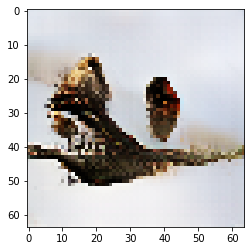

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 31

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 37.34412717819214 sec
Gen loss: 5.844467827298131, Gen valid loss: 1.4075049549583498, Gen attr loss: 4.436962861678787, Disc valid loss: 1.0348387951773357, Disc valid real loss: 0.529559048776058, Disc valid fake loss: 0.5052797440590897, Disc attr loss: 8.20892695747417, Disc attr real loss: 3.7719640957953806, Disc attr fake loss: 4.436962861678787
Time for epoch 2 is 37.46902656555176 sec
Gen loss: 5.789250161912706, Gen valid loss: 1.4050584185091137, Gen attr loss: 4.384191737265445, Disc valid loss: 1.0380022569400509, Disc valid real loss: 0.5309706877079113, Disc valid fake loss: 0.5070315686667838, Disc attr loss: 8.154239998923408, Disc attr real loss: 3.770048261657963, Disc attr fake loss: 4.384191737265445
Time for epoch 3 is 37.25123572349548 sec
Gen loss: 5.7241320635891215, Gen valid loss: 1.3878010857072949, Gen attr loss: 4.3363309

Time for epoch 23 is 37.42364740371704 sec
Gen loss: 5.778241101965349, Gen valid loss: 1.4065880142253266, Gen attr loss: 4.371653089678384, Disc valid loss: 1.0360422756290695, Disc valid real loss: 0.5297493331316041, Disc valid fake loss: 0.5062929419321096, Disc attr loss: 8.139808006079862, Disc attr real loss: 3.768154916401478, Disc attr fake loss: 4.371653089678384
Time for epoch 24 is 37.479920864105225 sec
Gen loss: 5.764589569432949, Gen valid loss: 1.3941752519710924, Gen attr loss: 4.370414313908192, Disc valid loss: 1.0407663927814825, Disc valid real loss: 0.5340226675436749, Disc valid fake loss: 0.5067437235417405, Disc attr loss: 8.1394239376554, Disc attr real loss: 3.7690096237472077, Disc attr fake loss: 4.370414313908192
Time for epoch 25 is 37.43353247642517 sec
Gen loss: 5.779412310944017, Gen valid loss: 1.39695275217537, Gen attr loss: 4.382459551984379, Disc valid loss: 1.037928293390972, Disc valid real loss: 0.5311396197897955, Disc valid fake loss: 0.5067

Time for epoch 45 is 37.16831588745117 sec
Gen loss: 5.747619690933848, Gen valid loss: 1.403263522842066, Gen attr loss: 4.34435615823844, Disc valid loss: 1.0344753174923946, Disc valid real loss: 0.5319253245827952, Disc valid fake loss: 0.5025499906481766, Disc attr loss: 8.110549865376335, Disc attr real loss: 3.766193707137896, Disc attr fake loss: 4.34435615823844
Time for epoch 46 is 37.356205701828 sec
Gen loss: 5.720116314203112, Gen valid loss: 1.3792284200508096, Gen attr loss: 4.340887893506182, Disc valid loss: 1.05017514700489, Disc valid real loss: 0.5363151213825557, Disc valid fake loss: 0.5138600268338108, Disc attr loss: 8.106882185793827, Disc attr real loss: 3.7659942922876457, Disc attr fake loss: 4.340887893506182
Time for epoch 47 is 37.2548291683197 sec
Gen loss: 5.750421203571929, Gen valid loss: 1.3894779197568816, Gen attr loss: 4.36094328510729, Disc valid loss: 1.038812842472459, Disc valid real loss: 0.5292096919806669, Disc valid fake loss: 0.5096031495

Time for epoch 67 is 37.385836601257324 sec
Gen loss: 5.758942859928783, Gen valid loss: 1.3952165900207147, Gen attr loss: 4.363726252785866, Disc valid loss: 1.0365870402757391, Disc valid real loss: 0.5332263647540798, Disc valid fake loss: 0.5033606769754312, Disc attr loss: 8.128307062112865, Disc attr real loss: 3.764580809326999, Disc attr fake loss: 4.363726252785866
Time for epoch 68 is 37.1455717086792 sec
Gen loss: 5.757127605479584, Gen valid loss: 1.401215844684177, Gen attr loss: 4.355911759503165, Disc valid loss: 1.0382690226159446, Disc valid real loss: 0.5321332873690742, Disc valid fake loss: 0.5061357363775817, Disc attr loss: 8.119458369769378, Disc attr real loss: 3.7635466102662125, Disc attr fake loss: 4.355911759503165
Time for epoch 69 is 37.20113945007324 sec
Gen loss: 5.765974078398087, Gen valid loss: 1.4030159311242867, Gen attr loss: 4.3629581469507395, Disc valid loss: 1.0341057950242103, Disc valid real loss: 0.532201832791331, Disc valid fake loss: 0.5

Time for epoch 89 is 37.37945818901062 sec
Gen loss: 5.746948668627235, Gen valid loss: 1.4057560471015247, Gen attr loss: 4.341192615710623, Disc valid loss: 1.028707626389294, Disc valid real loss: 0.5295521587860293, Disc valid fake loss: 0.4991554692993319, Disc attr loss: 8.101945249045768, Disc attr real loss: 3.7607526333351444, Disc attr fake loss: 4.341192615710623
Time for epoch 90 is 37.13137102127075 sec
Gen loss: 5.75343679671042, Gen valid loss: 1.4024359839072396, Gen attr loss: 4.351000807795744, Disc valid loss: 1.0375192645119458, Disc valid real loss: 0.5349485847523542, Disc valid fake loss: 0.502570679355766, Disc attr loss: 8.11099997639333, Disc attr real loss: 3.7599991685975858, Disc attr fake loss: 4.351000807795744
Time for epoch 91 is 37.15644335746765 sec
Gen loss: 5.774765938601196, Gen valid loss: 1.4125598333069302, Gen attr loss: 4.36220609980224, Disc valid loss: 1.0393448783776302, Disc valid real loss: 0.5313480071582122, Disc valid fake loss: 0.5079

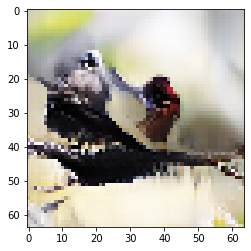

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 32

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 37.403698205947876 sec
Gen loss: 5.769395311350422, Gen valid loss: 1.3967506546315138, Gen attr loss: 4.372644644119553, Disc valid loss: 1.0425976842722595, Disc valid real loss: 0.5328785700365134, Disc valid fake loss: 0.5097191151241623, Disc attr loss: 8.133177613824364, Disc attr real loss: 3.7605329697048115, Disc attr fake loss: 4.372644644119553
Time for epoch 2 is 37.38526391983032 sec
Gen loss: 5.822379096736753, Gen valid loss: 1.4091895918859052, Gen attr loss: 4.413189508727572, Disc valid loss: 1.0340637188293746, Disc valid real loss: 0.5272853371250598, Disc valid fake loss: 0.5067783805736035, Disc attr loss: 8.172696742908096, Disc attr real loss: 3.7595072341805227, Disc attr fake loss: 4.413189508727572
Time for epoch 3 is 37.590500354766846 sec
Gen loss: 5.698409835174478, Gen valid loss: 1.3695292530990228, Gen attr loss: 4.328

Time for epoch 23 is 37.14631509780884 sec
Gen loss: 5.75090015871415, Gen valid loss: 1.3964541207161054, Gen attr loss: 4.35444603444438, Disc valid loss: 1.0456300985199327, Disc valid real loss: 0.5396390180116101, Disc valid fake loss: 0.5059910767123628, Disc attr loss: 8.110190806996208, Disc attr real loss: 3.7557447725518287, Disc attr fake loss: 4.35444603444438
Time for epoch 24 is 37.22583031654358 sec
Gen loss: 5.730189733065887, Gen valid loss: 1.3918209667128276, Gen attr loss: 4.338368759568791, Disc valid loss: 1.0392132758448118, Disc valid real loss: 0.5289099027470845, Disc valid fake loss: 0.5103033705940091, Disc attr loss: 8.09394954213605, Disc attr real loss: 3.7555807825672596, Disc attr fake loss: 4.338368759568791
Time for epoch 25 is 37.16146779060364 sec
Gen loss: 5.730760511020981, Gen valid loss: 1.3824436461053244, Gen attr loss: 4.348316851024059, Disc valid loss: 1.0440680168185454, Disc valid real loss: 0.5334990553578064, Disc valid fake loss: 0.510

Time for epoch 45 is 37.140419244766235 sec
Gen loss: 5.752425643486705, Gen valid loss: 1.407041861274378, Gen attr loss: 4.3453837856044615, Disc valid loss: 1.0290961357636181, Disc valid real loss: 0.5250159683750897, Disc valid fake loss: 0.5040801680346492, Disc attr loss: 8.098310022173212, Disc attr real loss: 3.752926236568751, Disc attr fake loss: 4.3453837856044615
Time for epoch 46 is 37.13426733016968 sec
Gen loss: 5.761803891923693, Gen valid loss: 1.4124479949635864, Gen attr loss: 4.349355886299112, Disc valid loss: 1.0412883639012571, Disc valid real loss: 0.5349484391328765, Disc valid fake loss: 0.5063399254952666, Disc attr loss: 8.103499795686261, Disc attr real loss: 3.754143909387149, Disc attr fake loss: 4.349355886299112
Time for epoch 47 is 37.18020439147949 sec
Gen loss: 5.749906992201559, Gen valid loss: 1.3995569963765337, Gen attr loss: 4.350349981287308, Disc valid loss: 1.038889028354066, Disc valid real loss: 0.5303112037459686, Disc valid fake loss: 0.

Time for epoch 67 is 37.289982080459595 sec
Gen loss: 5.724820807697327, Gen valid loss: 1.3897568491416248, Gen attr loss: 4.335063965986092, Disc valid loss: 1.0454363866550167, Disc valid real loss: 0.5334112303366829, Disc valid fake loss: 0.5120251553491525, Disc attr loss: 8.086376213445895, Disc attr real loss: 3.7513122474598046, Disc attr fake loss: 4.335063965986092
Time for epoch 68 is 36.94483780860901 sec
Gen loss: 5.723228395146729, Gen valid loss: 1.406238461574565, Gen attr loss: 4.316989925172594, Disc valid loss: 1.0395095343512248, Disc valid real loss: 0.5344186690926229, Disc valid fake loss: 0.5050908650970718, Disc attr loss: 8.067346108961235, Disc attr real loss: 3.7503561837886408, Disc attr fake loss: 4.316989925172594
Time for epoch 69 is 37.34960317611694 sec
Gen loss: 5.732082719725322, Gen valid loss: 1.39874943533564, Gen attr loss: 4.333333290043239, Disc valid loss: 1.0379430268838155, Disc valid real loss: 0.5312178344907477, Disc valid fake loss: 0.5

Time for epoch 89 is 37.08932304382324 sec
Gen loss: 5.745442612707453, Gen valid loss: 1.4013327928739512, Gen attr loss: 4.344109827910012, Disc valid loss: 1.0331579702010323, Disc valid real loss: 0.5324896671746159, Disc valid fake loss: 0.5006683021380003, Disc attr loss: 8.094253722891253, Disc attr real loss: 3.7501438949812393, Disc attr fake loss: 4.344109827910012
Time for epoch 90 is 36.97898292541504 sec
Gen loss: 5.7424557241320935, Gen valid loss: 1.3992093226450892, Gen attr loss: 4.343246403102306, Disc valid loss: 1.033517083501428, Disc valid real loss: 0.5247435550379559, Disc valid fake loss: 0.5087735280596467, Disc attr loss: 8.091529859113823, Disc attr real loss: 3.7482834560115164, Disc attr fake loss: 4.343246403102306
Time for epoch 91 is 37.03554844856262 sec
Gen loss: 5.72367273242816, Gen valid loss: 1.400823896493369, Gen attr loss: 4.322848840780698, Disc valid loss: 1.0496432135098672, Disc valid real loss: 0.5421536003509511, Disc valid fake loss: 0.5

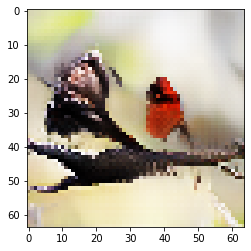

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 33

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 37.03899121284485 sec
Gen loss: 5.757402020741284, Gen valid loss: 1.3960726404900796, Gen attr loss: 4.361329386227823, Disc valid loss: 1.0450512926752975, Disc valid real loss: 0.5342286859909047, Disc valid fake loss: 0.5108226059575068, Disc attr loss: 8.110294577875111, Disc attr real loss: 3.7489651916472893, Disc attr fake loss: 4.361329386227823
Time for epoch 2 is 36.9769606590271 sec
Gen loss: 5.720054006188866, Gen valid loss: 1.3893326908592287, Gen attr loss: 4.330721322113906, Disc valid loss: 1.0427883952290709, Disc valid real loss: 0.5370156876439971, Disc valid fake loss: 0.5057727072620133, Disc attr loss: 8.077836695725356, Disc attr real loss: 3.74711537361145, Disc attr fake loss: 4.330721322113906
Time for epoch 3 is 37.12281537055969 sec
Gen loss: 5.742027586391624, Gen valid loss: 1.3973584588627181, Gen attr loss: 4.34466913

Time for epoch 23 is 36.95734143257141 sec
Gen loss: 5.718884291041511, Gen valid loss: 1.4226392701389343, Gen attr loss: 4.296245012179946, Disc valid loss: 1.0312486379773314, Disc valid real loss: 0.5271381516120621, Disc valid fake loss: 0.5041104866883296, Disc attr loss: 8.042223384386801, Disc attr real loss: 3.745978372206856, Disc attr fake loss: 4.296245012179946
Time for epoch 24 is 36.97355031967163 sec
Gen loss: 5.71922338299635, Gen valid loss: 1.3946008511028962, Gen attr loss: 4.324622510248407, Disc valid loss: 1.0432150601371517, Disc valid real loss: 0.5327178340778764, Disc valid fake loss: 0.5104972297744699, Disc attr loss: 8.071405961261533, Disc attr real loss: 3.7467834510131257, Disc attr fake loss: 4.324622510248407
Time for epoch 25 is 36.91692042350769 sec
Gen loss: 5.789333303446369, Gen valid loss: 1.4083899398483235, Gen attr loss: 4.380943366182529, Disc valid loss: 1.0295118473086577, Disc valid real loss: 0.5247592867874518, Disc valid fake loss: 0.5

Time for epoch 45 is 36.87828207015991 sec
Gen loss: 5.714557119178255, Gen valid loss: 1.3894399068542935, Gen attr loss: 4.325117221046592, Disc valid loss: 1.0451500136354752, Disc valid real loss: 0.5389501152807458, Disc valid fake loss: 0.5061998990008502, Disc attr loss: 8.068875551223755, Disc attr real loss: 3.743758330177162, Disc attr fake loss: 4.325117221046592
Time for epoch 46 is 36.878258228302 sec
Gen loss: 5.733081501027756, Gen valid loss: 1.408579686469825, Gen attr loss: 4.324501817465475, Disc valid loss: 1.0373562716533176, Disc valid real loss: 0.5308508465929729, Disc valid fake loss: 0.5065054240911634, Disc attr loss: 8.069572158622226, Disc attr real loss: 3.74507034115675, Disc attr fake loss: 4.324501817465475
Time for epoch 47 is 36.890265464782715 sec
Gen loss: 5.743078809443528, Gen valid loss: 1.389301259343217, Gen attr loss: 4.353777550100311, Disc valid loss: 1.0366448113911844, Disc valid real loss: 0.5307249336384823, Disc valid fake loss: 0.50591

Time for epoch 67 is 36.911921977996826 sec
Gen loss: 5.74370316761296, Gen valid loss: 1.4093408855965468, Gen attr loss: 4.334362268447876, Disc valid loss: 1.0349045667221877, Disc valid real loss: 0.5297335573651281, Disc valid fake loss: 0.5051710087917038, Disc attr loss: 8.077406578916845, Disc attr real loss: 3.743044310468968, Disc attr fake loss: 4.334362268447876
Time for epoch 68 is 36.8486065864563 sec
Gen loss: 5.721422747221743, Gen valid loss: 1.3957145595292089, Gen attr loss: 4.325708179292963, Disc valid loss: 1.046789637749111, Disc valid real loss: 0.5366205156334047, Disc valid fake loss: 0.5101691205004043, Disc attr loss: 8.070293176464919, Disc attr real loss: 3.744584997171955, Disc attr fake loss: 4.325708179292963
Time for epoch 69 is 36.84496331214905 sec
Gen loss: 5.6932015057178695, Gen valid loss: 1.3789770961776981, Gen attr loss: 4.31422440857099, Disc valid loss: 1.0484739223792947, Disc valid real loss: 0.5386329547661107, Disc valid fake loss: 0.509

Time for epoch 89 is 36.892242431640625 sec
Gen loss: 5.752373524797641, Gen valid loss: 1.3962910572687786, Gen attr loss: 4.356082474959252, Disc valid loss: 1.0364211049829395, Disc valid real loss: 0.5294171873793047, Disc valid fake loss: 0.5070039169575141, Disc attr loss: 8.098247779417168, Disc attr real loss: 3.7421653044579153, Disc attr fake loss: 4.356082474959252
Time for epoch 90 is 36.82370972633362 sec
Gen loss: 5.732375656686178, Gen valid loss: 1.411850949289999, Gen attr loss: 4.3205247080423, Disc valid loss: 1.0275370456015838, Disc valid real loss: 0.5266345144125827, Disc valid fake loss: 0.5009025296544641, Disc attr loss: 8.062643701144996, Disc attr real loss: 3.7421189931026966, Disc attr fake loss: 4.3205247080423
Time for epoch 91 is 36.781009674072266 sec
Gen loss: 5.716559296377953, Gen valid loss: 1.3901177727110017, Gen attr loss: 4.326441535458655, Disc valid loss: 1.052470222721255, Disc valid real loss: 0.5379582352754546, Disc valid fake loss: 0.514

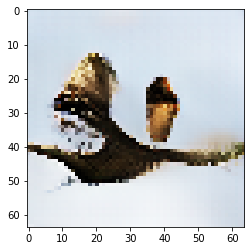

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 34

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 36.76541018486023 sec
Gen loss: 5.762857481070005, Gen valid loss: 1.4101207269239555, Gen attr loss: 4.352736763837861, Disc valid loss: 1.0371237227587196, Disc valid real loss: 0.5301238879117216, Disc valid fake loss: 0.5069998321817496, Disc attr loss: 8.092892989233581, Disc attr real loss: 3.7401562253957197, Disc attr fake loss: 4.352736763837861
Time for epoch 2 is 36.79890513420105 sec
Gen loss: 5.774370596660831, Gen valid loss: 1.3918759596703176, Gen attr loss: 4.382494638282755, Disc valid loss: 1.0404941417014373, Disc valid real loss: 0.5385210476916656, Disc valid fake loss: 0.501973091182993, Disc attr loss: 8.122650494743493, Disc attr real loss: 3.7401558564607367, Disc attr fake loss: 4.382494638282755
Time for epoch 3 is 36.77669024467468 sec
Gen loss: 5.718321280750802, Gen valid loss: 1.397546883197981, Gen attr loss: 4.3207744

Time for epoch 23 is 36.9021258354187 sec
Gen loss: 5.71643150918852, Gen valid loss: 1.4094454192210666, Gen attr loss: 4.306986092228876, Disc valid loss: 1.034173450011225, Disc valid real loss: 0.5295822890147284, Disc valid fake loss: 0.5045911603503757, Disc attr loss: 8.045356356354587, Disc attr real loss: 3.7383702641257104, Disc attr fake loss: 4.306986092228876
Time for epoch 24 is 36.57570481300354 sec
Gen loss: 5.724148893743996, Gen valid loss: 1.3900706541893606, Gen attr loss: 4.334078231801185, Disc valid loss: 1.0482863090871795, Disc valid real loss: 0.5363541972346422, Disc valid fake loss: 0.5119321122563628, Disc attr loss: 8.073807269254027, Disc attr real loss: 3.7397290374528427, Disc attr fake loss: 4.334078231801185
Time for epoch 25 is 36.756680727005005 sec
Gen loss: 5.688893183783141, Gen valid loss: 1.3869537518922552, Gen attr loss: 4.301939437059852, Disc valid loss: 1.0362090596015536, Disc valid real loss: 0.5291245758210418, Disc valid fake loss: 0.5

Time for epoch 45 is 36.75686860084534 sec
Gen loss: 5.7558470573528675, Gen valid loss: 1.4077841715437933, Gen attr loss: 4.348062892593342, Disc valid loss: 1.0358262572508194, Disc valid real loss: 0.528268026465646, Disc valid fake loss: 0.5075582312697641, Disc attr loss: 8.085438566802317, Disc attr real loss: 3.7373756742089745, Disc attr fake loss: 4.348062892593342
Time for epoch 46 is 36.69755792617798 sec
Gen loss: 5.695949807722717, Gen valid loss: 1.3919730748587507, Gen attr loss: 4.303976726402758, Disc valid loss: 1.048014685875032, Disc valid real loss: 0.5363917509876293, Disc valid fake loss: 0.5116229352912283, Disc attr loss: 8.040390238852359, Disc attr real loss: 3.7364135124496003, Disc attr fake loss: 4.303976726402758
Time for epoch 47 is 36.67835068702698 sec
Gen loss: 5.718939708823434, Gen valid loss: 1.4003016984236596, Gen attr loss: 4.318638013307318, Disc valid loss: 1.0373324528942263, Disc valid real loss: 0.5314092180593227, Disc valid fake loss: 0.

Time for epoch 67 is 36.75974702835083 sec
Gen loss: 5.700153202222292, Gen valid loss: 1.3890769061680408, Gen attr loss: 4.311076291531405, Disc valid loss: 1.0378029243086735, Disc valid real loss: 0.5318513496458369, Disc valid fake loss: 0.5059515740974809, Disc attr loss: 8.045902929977997, Disc attr real loss: 3.7348266384465907, Disc attr fake loss: 4.311076291531405
Time for epoch 68 is 36.74331831932068 sec
Gen loss: 5.709502541921972, Gen valid loss: 1.4009807132446992, Gen attr loss: 4.308521836107662, Disc valid loss: 1.0374205700427213, Disc valid real loss: 0.5350032864708888, Disc valid fake loss: 0.502417284702544, Disc attr loss: 8.043186321491149, Disc attr real loss: 3.734664485383486, Disc attr fake loss: 4.308521836107662
Time for epoch 69 is 36.69618773460388 sec
Gen loss: 5.715368988068123, Gen valid loss: 1.3975413837407016, Gen attr loss: 4.317827604650482, Disc valid loss: 1.0440843433222473, Disc valid real loss: 0.53257198861944, Disc valid fake loss: 0.511

Time for epoch 89 is 36.69514036178589 sec
Gen loss: 5.676115905689353, Gen valid loss: 1.3955671564350283, Gen attr loss: 4.280548745700661, Disc valid loss: 1.0402122724670058, Disc valid real loss: 0.531150837981604, Disc valid fake loss: 0.509061433758516, Disc attr loss: 8.013806790194215, Disc attr real loss: 3.733258044493554, Disc attr fake loss: 4.280548745700661
Time for epoch 90 is 36.63503384590149 sec
Gen loss: 5.687218916771535, Gen valid loss: 1.3792447168329545, Gen attr loss: 4.307974208661212, Disc valid loss: 1.0457855928234938, Disc valid real loss: 0.5347863560931146, Disc valid fake loss: 0.5109992344689563, Disc attr loss: 8.038965984411679, Disc attr real loss: 3.730991775750468, Disc attr fake loss: 4.307974208661212
Time for epoch 91 is 36.647550106048584 sec
Gen loss: 5.694279765048971, Gen valid loss: 1.374948320673087, Gen attr loss: 4.319331444375884, Disc valid loss: 1.051209324420629, Disc valid real loss: 0.5386896731892252, Disc valid fake loss: 0.5125

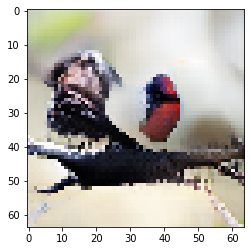

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 35

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 36.61027264595032 sec
Gen loss: 5.728692747390044, Gen valid loss: 1.4000281496099662, Gen attr loss: 4.328664594872534, Disc valid loss: 1.0432124171799761, Disc valid real loss: 0.5335463528549121, Disc valid fake loss: 0.5096660616598155, Disc attr loss: 8.059208935838404, Disc attr real loss: 3.7305443409658707, Disc attr fake loss: 4.328664594872534
Time for epoch 2 is 36.746952056884766 sec
Gen loss: 5.678376107358028, Gen valid loss: 1.3968660330707787, Gen attr loss: 4.281510091409451, Disc valid loss: 1.0378422404369365, Disc valid real loss: 0.5321534435923506, Disc valid fake loss: 0.5056887965215254, Disc attr loss: 8.013918631768162, Disc attr real loss: 3.7324085403587115, Disc attr fake loss: 4.281510091409451
Time for epoch 3 is 36.65261793136597 sec
Gen loss: 5.732173255465541, Gen valid loss: 1.399588727369541, Gen attr loss: 4.33258

Time for epoch 23 is 36.709125995635986 sec
Gen loss: 5.7314469252175435, Gen valid loss: 1.387633190083956, Gen attr loss: 4.343813734002876, Disc valid loss: 1.0524778076949803, Disc valid real loss: 0.5411023365126716, Disc valid fake loss: 0.5113754677094096, Disc attr loss: 8.072710867496687, Disc attr real loss: 3.728897133493811, Disc attr fake loss: 4.343813734002876
Time for epoch 24 is 36.66118359565735 sec
Gen loss: 5.715505293714322, Gen valid loss: 1.3980113455273595, Gen attr loss: 4.31749394657166, Disc valid loss: 1.036157006493752, Disc valid real loss: 0.5265794733998576, Disc valid fake loss: 0.5095775309940017, Disc attr loss: 8.048188613359198, Disc attr real loss: 3.730694666787538, Disc attr fake loss: 4.31749394657166
Time for epoch 25 is 36.65728807449341 sec
Gen loss: 5.716129478723376, Gen valid loss: 1.406220981099095, Gen attr loss: 4.3099085057007915, Disc valid loss: 1.0326241330725714, Disc valid real loss: 0.5276918658396093, Disc valid fake loss: 0.504

Time for epoch 45 is 36.71398162841797 sec
Gen loss: 5.672986552644228, Gen valid loss: 1.383923514425593, Gen attr loss: 4.289063036280273, Disc valid loss: 1.0454451351307918, Disc valid real loss: 0.5336495146034209, Disc valid fake loss: 0.5117956204466058, Disc attr loss: 8.016175343092218, Disc attr real loss: 3.727112306811945, Disc attr fake loss: 4.289063036280273
Time for epoch 46 is 36.97313976287842 sec
Gen loss: 5.696115088010545, Gen valid loss: 1.3845352215495537, Gen attr loss: 4.31157986516875, Disc valid loss: 1.0516368821061401, Disc valid real loss: 0.5408603855103336, Disc valid fake loss: 0.5107764973226925, Disc attr loss: 8.037820528516278, Disc attr real loss: 3.7262406633475287, Disc attr fake loss: 4.31157986516875
Time for epoch 47 is 36.920491456985474 sec
Gen loss: 5.69704389959816, Gen valid loss: 1.3732849915176226, Gen attr loss: 4.323758912280323, Disc valid loss: 1.0517523791085737, Disc valid real loss: 0.5364352588246508, Disc valid fake loss: 0.515

Time for epoch 67 is 36.944472789764404 sec
Gen loss: 5.684002028571235, Gen valid loss: 1.3909698427531132, Gen attr loss: 4.293032173218766, Disc valid loss: 1.0397270822589637, Disc valid real loss: 0.5350870670987985, Disc valid fake loss: 0.5046400125756819, Disc attr loss: 8.019631717263199, Disc attr real loss: 3.7265995440444324, Disc attr fake loss: 4.293032173218766
Time for epoch 68 is 36.93277096748352 sec
Gen loss: 5.699040732086512, Gen valid loss: 1.3892605307948622, Gen attr loss: 4.30978019321514, Disc valid loss: 1.0465111632334185, Disc valid real loss: 0.5377613873016543, Disc valid fake loss: 0.5087497798892541, Disc attr loss: 8.035738490784395, Disc attr real loss: 3.725958297569254, Disc attr fake loss: 4.30978019321514
Time for epoch 69 is 36.99552845954895 sec
Gen loss: 5.682148553491608, Gen valid loss: 1.384499617062287, Gen attr loss: 4.297648933198717, Disc valid loss: 1.0413109422699223, Disc valid real loss: 0.534473218165116, Disc valid fake loss: 0.506

Time for epoch 89 is 36.952824115753174 sec
Gen loss: 5.689952513066734, Gen valid loss: 1.3915304678888503, Gen attr loss: 4.298422056808058, Disc valid loss: 1.0378481585805008, Disc valid real loss: 0.5303239248955476, Disc valid fake loss: 0.5075242356233157, Disc attr loss: 8.023600504004213, Disc attr real loss: 3.725178447196154, Disc attr fake loss: 4.298422056808058
Time for epoch 90 is 36.935545921325684 sec
Gen loss: 5.681501062904916, Gen valid loss: 1.3924162152013804, Gen attr loss: 4.289084861595133, Disc valid loss: 1.0433561956979396, Disc valid real loss: 0.5348088737264235, Disc valid fake loss: 0.5085473253636502, Disc attr loss: 8.01457823647393, Disc attr real loss: 3.725493374878798, Disc attr fake loss: 4.289084861595133
Time for epoch 91 is 36.94859457015991 sec
Gen loss: 5.693453289952059, Gen valid loss: 1.3907272201889576, Gen attr loss: 4.30272607751655, Disc valid loss: 1.0465477501473777, Disc valid real loss: 0.537663643114612, Disc valid fake loss: 0.50

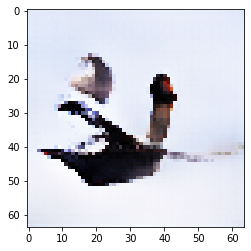

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 36

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 36.907363176345825 sec
Gen loss: 5.775899667403885, Gen valid loss: 1.4069610653207878, Gen attr loss: 4.368938601760037, Disc valid loss: 1.0371045416932765, Disc valid real loss: 0.530058120566655, Disc valid fake loss: 0.5070464204805007, Disc attr loss: 8.093418368802162, Disc attr real loss: 3.7244797670421237, Disc attr fake loss: 4.368938601760037
Time for epoch 2 is 36.79319977760315 sec
Gen loss: 5.696485030941847, Gen valid loss: 1.3878701867126837, Gen attr loss: 4.308614842613861, Disc valid loss: 1.0484661831442257, Disc valid real loss: 0.537676641692314, Disc valid fake loss: 0.5107895421787976, Disc attr loss: 8.034867465657593, Disc attr real loss: 3.7262526230437323, Disc attr fake loss: 4.308614842613861
Time for epoch 3 is 36.80163025856018 sec
Gen loss: 5.655008229459851, Gen valid loss: 1.3716851934830994, Gen attr loss: 4.283323

Time for epoch 23 is 36.885536670684814 sec
Gen loss: 5.69149225901782, Gen valid loss: 1.394374682974363, Gen attr loss: 4.297117578951001, Disc valid loss: 1.046710271983935, Disc valid real loss: 0.5342379624281473, Disc valid fake loss: 0.5124723100403783, Disc attr loss: 8.018978272027116, Disc attr real loss: 3.7218606930761156, Disc attr fake loss: 4.297117578951001
Time for epoch 24 is 36.94876217842102 sec
Gen loss: 5.661813589938611, Gen valid loss: 1.392763837889281, Gen attr loss: 4.269049758187477, Disc valid loss: 1.0313768603291291, Disc valid real loss: 0.525973864283342, Disc valid fake loss: 0.5054029987918006, Disc attr loss: 7.991717109189124, Disc attr real loss: 3.7226673510016464, Disc attr fake loss: 4.269049758187477
Time for epoch 25 is 36.90190029144287 sec
Gen loss: 5.685014589046075, Gen valid loss: 1.3921527788244934, Gen attr loss: 4.29286180860628, Disc valid loss: 1.039047104556386, Disc valid real loss: 0.5349061637713011, Disc valid fake loss: 0.50414

Time for epoch 45 is 37.1597204208374 sec
Gen loss: 5.680316486978919, Gen valid loss: 1.3785113091391277, Gen attr loss: 4.301805178970502, Disc valid loss: 1.0470781586357572, Disc valid real loss: 0.5346617707553595, Disc valid fake loss: 0.5124163879611627, Disc attr loss: 8.022624502337075, Disc attr real loss: 3.7208193233665736, Disc attr fake loss: 4.301805178970502
Time for epoch 46 is 36.91505813598633 sec
Gen loss: 5.664372150813984, Gen valid loss: 1.3872307391993721, Gen attr loss: 4.277141416622048, Disc valid loss: 1.0463324641470664, Disc valid real loss: 0.5333956973501014, Disc valid fake loss: 0.5129367659085489, Disc attr loss: 7.997585100856254, Disc attr real loss: 3.7204436842342057, Disc attr fake loss: 4.277141416622048
Time for epoch 47 is 36.965070962905884 sec
Gen loss: 5.67557624749698, Gen valid loss: 1.380355871143703, Gen attr loss: 4.295220371830431, Disc valid loss: 1.0456017522307914, Disc valid real loss: 0.5373520275280081, Disc valid fake loss: 0.5

Time for epoch 67 is 36.95964336395264 sec
Gen loss: 5.703409087690234, Gen valid loss: 1.3856720488245895, Gen attr loss: 4.317737041127068, Disc valid loss: 1.0454043203253087, Disc valid real loss: 0.532158837166582, Disc valid fake loss: 0.513245480251183, Disc attr loss: 8.03776084181416, Disc attr real loss: 3.720023800687092, Disc attr fake loss: 4.317737041127068
Time for epoch 68 is 36.997132539749146 sec
Gen loss: 5.674190367463481, Gen valid loss: 1.3892260996629875, Gen attr loss: 4.2849642616623465, Disc valid loss: 1.0439255357111696, Disc valid real loss: 0.5313051821093572, Disc valid fake loss: 0.5126203512596245, Disc attr loss: 8.004197936070966, Disc attr real loss: 3.7192336744086205, Disc attr fake loss: 4.2849642616623465
Time for epoch 69 is 37.00511622428894 sec
Gen loss: 5.635691576856908, Gen valid loss: 1.3826654202892852, Gen attr loss: 4.253026167551677, Disc valid loss: 1.0471006723923413, Disc valid real loss: 0.5325458745161692, Disc valid fake loss: 0.

Time for epoch 89 is 37.01372742652893 sec
Gen loss: 5.663023986144441, Gen valid loss: 1.3797661321273018, Gen attr loss: 4.283257850786534, Disc valid loss: 1.0487604687207437, Disc valid real loss: 0.5354773456326668, Disc valid fake loss: 0.5132831240572581, Disc attr loss: 8.001750350321535, Disc attr real loss: 3.718492499535, Disc attr fake loss: 4.283257850786534
Time for epoch 90 is 37.01231551170349 sec
Gen loss: 5.671015770454717, Gen valid loss: 1.3860440089450619, Gen attr loss: 4.284971768293923, Disc valid loss: 1.0404003060607083, Disc valid real loss: 0.5334782283803635, Disc valid fake loss: 0.5069220758227475, Disc attr loss: 8.002529446025529, Disc attr real loss: 3.7175576777316044, Disc attr fake loss: 4.284971768293923
Time for epoch 91 is 36.98450565338135 sec
Gen loss: 5.6428330661804695, Gen valid loss: 1.3854248610938467, Gen attr loss: 4.257408207348045, Disc valid loss: 1.052078817433458, Disc valid real loss: 0.536307136944639, Disc valid fake loss: 0.5157

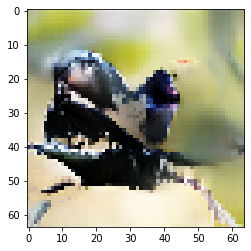

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 37

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 37.002506732940674 sec
Gen loss: 5.6785708094030865, Gen valid loss: 1.388764872137447, Gen attr loss: 4.289805933711975, Disc valid loss: 1.0475333312016515, Disc valid real loss: 0.5353599859447014, Disc valid fake loss: 0.5121733484875542, Disc attr loss: 8.007591916293633, Disc attr real loss: 3.717785982581658, Disc attr fake loss: 4.289805933711975
Time for epoch 2 is 36.883148431777954 sec
Gen loss: 5.676841934845053, Gen valid loss: 1.3952815594065804, Gen attr loss: 4.281560402898608, Disc valid loss: 1.0395179660662726, Disc valid real loss: 0.532201218249675, Disc valid fake loss: 0.5073167499164902, Disc attr loss: 7.997915572913358, Disc attr real loss: 3.716355170014751, Disc attr fake loss: 4.281560402898608
Time for epoch 3 is 36.981794595718384 sec
Gen loss: 5.734912784442023, Gen valid loss: 1.3881576503841535, Gen attr loss: 4.34675

Time for epoch 23 is 36.939664363861084 sec
Gen loss: 5.722996388670552, Gen valid loss: 1.3841764739535365, Gen attr loss: 4.338819917301499, Disc valid loss: 1.050614944479976, Disc valid real loss: 0.5363093358552876, Disc valid fake loss: 0.5143056087054534, Disc attr loss: 8.054037899182742, Disc attr real loss: 3.7152179818812425, Disc attr fake loss: 4.338819917301499
Time for epoch 24 is 36.917296171188354 sec
Gen loss: 5.730849483148838, Gen valid loss: 1.4030952429383752, Gen attr loss: 4.3277542468332015, Disc valid loss: 1.0306712164465328, Disc valid real loss: 0.52944965818064, Disc valid fake loss: 0.5012215593966042, Disc attr loss: 8.042842992276034, Disc attr real loss: 3.7150887454428325, Disc attr fake loss: 4.3277542468332015
Time for epoch 25 is 36.95369291305542 sec
Gen loss: 5.709005202058208, Gen valid loss: 1.3866924163771839, Gen attr loss: 4.322312780188997, Disc valid loss: 1.0465420639611842, Disc valid real loss: 0.534359451474213, Disc valid fake loss: 0

Time for epoch 45 is 36.96620488166809 sec
Gen loss: 5.649417497278229, Gen valid loss: 1.3868964668211898, Gen attr loss: 4.262521041441093, Disc valid loss: 1.0459603282817334, Disc valid real loss: 0.5336684490930097, Disc valid fake loss: 0.5122918791079586, Disc attr loss: 7.975669489966498, Disc attr real loss: 3.7131484485254056, Disc attr fake loss: 4.262521041441093
Time for epoch 46 is 37.25226902961731 sec
Gen loss: 5.676889126216816, Gen valid loss: 1.3909339384657904, Gen attr loss: 4.285955171921066, Disc valid loss: 1.042033724507019, Disc valid real loss: 0.5356675074675542, Disc valid fake loss: 0.5063662200277737, Disc attr loss: 8.001048315508255, Disc attr real loss: 3.71509314358719, Disc attr fake loss: 4.285955171921066
Time for epoch 47 is 37.0100634098053 sec
Gen loss: 5.686129713446144, Gen valid loss: 1.3842968766282244, Gen attr loss: 4.301832835525678, Disc valid loss: 1.0399348134916973, Disc valid real loss: 0.5301128169546928, Disc valid fake loss: 0.509

Time for epoch 67 is 37.085774183273315 sec
Gen loss: 5.632438067821306, Gen valid loss: 1.3857807030845788, Gen attr loss: 4.246657372167117, Disc valid loss: 1.0482762094112592, Disc valid real loss: 0.5364604581016189, Disc valid fake loss: 0.5118157528441772, Disc attr loss: 7.9591610463977185, Disc attr real loss: 3.7125036742306015, Disc attr fake loss: 4.246657372167117
Time for epoch 68 is 37.01140856742859 sec
Gen loss: 5.653043935615519, Gen valid loss: 1.3830613936512128, Gen attr loss: 4.269982535018507, Disc valid loss: 1.050745740815553, Disc valid real loss: 0.537452354017635, Disc valid fake loss: 0.5132933893824011, Disc attr loss: 7.98408465010687, Disc attr real loss: 3.714102115088362, Disc attr fake loss: 4.269982535018507
Time for epoch 69 is 37.02019476890564 sec
Gen loss: 5.675858422669615, Gen valid loss: 1.3961049218164874, Gen attr loss: 4.279753503437611, Disc valid loss: 1.038737777287398, Disc valid real loss: 0.5319433124246313, Disc valid fake loss: 0.50

Time for epoch 89 is 37.24440097808838 sec
Gen loss: 5.661313783185592, Gen valid loss: 1.394098237601076, Gen attr loss: 4.267215547199818, Disc valid loss: 1.046553528728847, Disc valid real loss: 0.5335258049208943, Disc valid fake loss: 0.5130277246156036, Disc attr loss: 7.977796757447364, Disc attr real loss: 3.7105812102475464, Disc attr fake loss: 4.267215547199818
Time for epoch 90 is 37.0499701499939 sec
Gen loss: 5.682013365634412, Gen valid loss: 1.3842766520776724, Gen attr loss: 4.2977367171104035, Disc valid loss: 1.0458754267149823, Disc valid real loss: 0.5312582075918916, Disc valid fake loss: 0.5146172181539096, Disc attr loss: 8.006673146715656, Disc attr real loss: 3.7089364296052514, Disc attr fake loss: 4.2977367171104035
Time for epoch 91 is 37.00686430931091 sec
Gen loss: 5.685714259057187, Gen valid loss: 1.3657156627998766, Gen attr loss: 4.319998604818411, Disc valid loss: 1.057540541580376, Disc valid real loss: 0.5396549195293489, Disc valid fake loss: 0.5

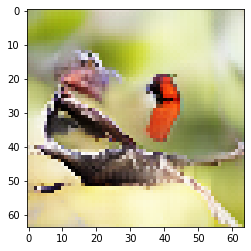

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 38

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 36.958985328674316 sec
Gen loss: 5.680970239768507, Gen valid loss: 1.3992973275300933, Gen attr loss: 4.281672915145957, Disc valid loss: 1.0422360502930514, Disc valid real loss: 0.530164211180798, Disc valid fake loss: 0.5120718369315956, Disc attr loss: 7.990037711332161, Disc attr real loss: 3.708364796186204, Disc attr fake loss: 4.281672915145957
Time for epoch 2 is 37.16757416725159 sec
Gen loss: 5.665468372303619, Gen valid loss: 1.3948033211353994, Gen attr loss: 4.270665051168219, Disc valid loss: 1.0379169206955245, Disc valid real loss: 0.5281693661600594, Disc valid fake loss: 0.5097475517894517, Disc attr loss: 7.980952351396969, Disc attr real loss: 3.7102873002287495, Disc attr fake loss: 4.270665051168219
Time for epoch 3 is 37.105494022369385 sec
Gen loss: 5.641597021562943, Gen valid loss: 1.3758533146323226, Gen attr loss: 4.26574

Time for epoch 23 is 37.168400049209595 sec
Gen loss: 5.668754099507319, Gen valid loss: 1.3961284965034422, Gen attr loss: 4.272625592989004, Disc valid loss: 1.0442543515991065, Disc valid real loss: 0.5363051010179649, Disc valid fake loss: 0.507949253973276, Disc attr loss: 7.978382756716513, Disc attr real loss: 3.7057571637275095, Disc attr fake loss: 4.272625592989004
Time for epoch 24 is 37.07225775718689 sec
Gen loss: 5.65951413384621, Gen valid loss: 1.3813740478621588, Gen attr loss: 4.278140093899031, Disc valid loss: 1.0492575995644258, Disc valid real loss: 0.5361286522896309, Disc valid fake loss: 0.5131289480824458, Disc attr loss: 7.985527764167889, Disc attr real loss: 3.7073876702688575, Disc attr fake loss: 4.278140093899031
Time for epoch 25 is 37.09040093421936 sec
Gen loss: 5.640035834738879, Gen valid loss: 1.3890359203020732, Gen attr loss: 4.250999907491007, Disc valid loss: 1.0387858594982282, Disc valid real loss: 0.5353360911856498, Disc valid fake loss: 0.

Time for epoch 45 is 37.0456748008728 sec
Gen loss: 5.620520948394527, Gen valid loss: 1.3818020494326666, Gen attr loss: 4.238718896054317, Disc valid loss: 1.0474017688898536, Disc valid real loss: 0.5374249942742066, Disc valid fake loss: 0.5099767748579423, Disc attr loss: 7.944819368967196, Disc attr real loss: 3.706100472912879, Disc attr fake loss: 4.238718896054317
Time for epoch 46 is 37.03953313827515 sec
Gen loss: 5.64371289922616, Gen valid loss: 1.3821868415124372, Gen attr loss: 4.261526058036783, Disc valid loss: 1.0530511900015316, Disc valid real loss: 0.5364364002778278, Disc valid fake loss: 0.516614791419771, Disc attr loss: 7.967207765191551, Disc attr real loss: 3.7056817071547674, Disc attr fake loss: 4.261526058036783
Time for epoch 47 is 37.043596506118774 sec
Gen loss: 5.652514854420814, Gen valid loss: 1.4024810254735351, Gen attr loss: 4.250033814732621, Disc valid loss: 1.0345094194257163, Disc valid real loss: 0.5312166026614222, Disc valid fake loss: 0.50

Time for epoch 67 is 37.29094409942627 sec
Gen loss: 5.675124320880507, Gen valid loss: 1.3934317449244058, Gen attr loss: 4.2816925694948935, Disc valid loss: 1.0386822934396223, Disc valid real loss: 0.5286166757587495, Disc valid fake loss: 0.5100656166309263, Disc attr loss: 7.986039542247286, Disc attr real loss: 3.704346972752393, Disc attr fake loss: 4.2816925694948935
Time for epoch 68 is 37.2606143951416 sec
Gen loss: 5.6586674907343175, Gen valid loss: 1.3839020422157557, Gen attr loss: 4.274765446257139, Disc valid loss: 1.04792756746778, Disc valid real loss: 0.5346940537778343, Disc valid fake loss: 0.5132335134476504, Disc attr loss: 7.978867233607181, Disc attr real loss: 3.704101787350042, Disc attr fake loss: 4.274765446257139
Time for epoch 69 is 37.025248765945435 sec
Gen loss: 5.62488252102198, Gen valid loss: 1.3796725806181993, Gen attr loss: 4.24520994008072, Disc valid loss: 1.0459035329702424, Disc valid real loss: 0.5356292884524275, Disc valid fake loss: 0.51

Time for epoch 89 is 36.95781493186951 sec
Gen loss: 5.683978392179743, Gen valid loss: 1.381723917919769, Gen attr loss: 4.302254476521396, Disc valid loss: 1.0445216157572057, Disc valid real loss: 0.5333945033996086, Disc valid fake loss: 0.5111271134883084, Disc attr loss: 8.003997179227794, Disc attr real loss: 3.7017427027063965, Disc attr fake loss: 4.302254476521396
Time for epoch 90 is 37.173194885253906 sec
Gen loss: 5.623555405676203, Gen valid loss: 1.3847204756930591, Gen attr loss: 4.238834951628191, Disc valid loss: 1.0417321262966972, Disc valid real loss: 0.5357466066271309, Disc valid fake loss: 0.5059855196695664, Disc attr loss: 7.942066990586154, Disc attr real loss: 3.703232038957963, Disc attr fake loss: 4.238834951628191
Time for epoch 91 is 36.900026082992554 sec
Gen loss: 5.6194722167844695, Gen valid loss: 1.3778417061984054, Gen attr loss: 4.241630516724212, Disc valid loss: 1.053797654020108, Disc valid real loss: 0.5379349531196966, Disc valid fake loss: 0

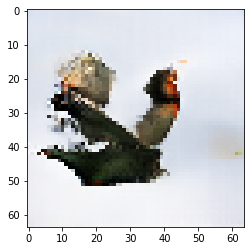

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 39

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 36.97968816757202 sec
Gen loss: 5.659763440853212, Gen valid loss: 1.3935138620335235, Gen attr loss: 4.266249583019474, Disc valid loss: 1.0459609978244233, Disc valid real loss: 0.5325676864240227, Disc valid fake loss: 0.513393312531112, Disc attr loss: 7.967345519440607, Disc attr real loss: 3.701095936421133, Disc attr fake loss: 4.266249583019474
Time for epoch 2 is 36.999961137771606 sec
Gen loss: 5.687700405999574, Gen valid loss: 1.4030949953125744, Gen attr loss: 4.284605402287429, Disc valid loss: 1.0355216650781915, Disc valid real loss: 0.5293593287144897, Disc valid fake loss: 0.5061623387058899, Disc attr loss: 7.986835064926768, Disc attr real loss: 3.702229662639339, Disc attr fake loss: 4.284605402287429
Time for epoch 3 is 37.03874659538269 sec
Gen loss: 5.652872461613601, Gen valid loss: 1.3949101455812531, Gen attr loss: 4.2579623

Time for epoch 23 is 36.93088984489441 sec
Gen loss: 5.63199163064724, Gen valid loss: 1.380435302974732, Gen attr loss: 4.251556313780911, Disc valid loss: 1.0518899996106217, Disc valid real loss: 0.5364154154046118, Disc valid fake loss: 0.5154745856597818, Disc attr loss: 7.951785499810526, Disc attr real loss: 3.700229186029615, Disc attr fake loss: 4.251556313780911
Time for epoch 24 is 36.95256280899048 sec
Gen loss: 5.631534050473676, Gen valid loss: 1.3901166818975432, Gen attr loss: 4.241417365345528, Disc valid loss: 1.042737617402219, Disc valid real loss: 0.5318687337685407, Disc valid fake loss: 0.5108688856528057, Disc attr loss: 7.941603678028758, Disc attr real loss: 3.7001863126832295, Disc attr fake loss: 4.241417365345528
Time for epoch 25 is 36.9976372718811 sec
Gen loss: 5.618698403118103, Gen valid loss: 1.3781055018184631, Gen attr loss: 4.240592900976579, Disc valid loss: 1.0467301439140548, Disc valid real loss: 0.5349700555891849, Disc valid fake loss: 0.5117

Time for epoch 45 is 36.925495624542236 sec
Gen loss: 5.645964645757908, Gen valid loss: 1.374730700076757, Gen attr loss: 4.271233951496238, Disc valid loss: 1.044857296032634, Disc valid real loss: 0.5354246352584704, Disc valid fake loss: 0.5094326585127409, Disc attr loss: 7.968945994286679, Disc attr real loss: 3.6977120427904415, Disc attr fake loss: 4.271233951496238
Time for epoch 46 is 36.91185259819031 sec
Gen loss: 5.614230948088938, Gen valid loss: 1.375165311301627, Gen attr loss: 4.2390656290338615, Disc valid loss: 1.0528263855109692, Disc valid real loss: 0.5359615677902045, Disc valid fake loss: 0.5168648175592345, Disc attr loss: 7.936369643301822, Disc attr real loss: 3.69730401426796, Disc attr fake loss: 4.2390656290338615
Time for epoch 47 is 36.883261919021606 sec
Gen loss: 5.616738298721106, Gen valid loss: 1.3817737070202505, Gen attr loss: 4.234964592346977, Disc valid loss: 1.0431069554029118, Disc valid real loss: 0.5323403560856816, Disc valid fake loss: 0.

Time for epoch 67 is 36.89952564239502 sec
Gen loss: 5.625552119278327, Gen valid loss: 1.3881614187222509, Gen attr loss: 4.237390693933337, Disc valid loss: 1.0438016934123466, Disc valid real loss: 0.5336345214507767, Disc valid fake loss: 0.5101671730922813, Disc attr loss: 7.933312553054272, Disc attr real loss: 3.695921859120935, Disc attr fake loss: 4.237390693933337
Time for epoch 68 is 36.9247305393219 sec
Gen loss: 5.616727662280323, Gen valid loss: 1.3782853921900597, Gen attr loss: 4.238442247799095, Disc valid loss: 1.0521579846780151, Disc valid real loss: 0.5370094929607256, Disc valid fake loss: 0.5151484922018801, Disc attr loss: 7.934093738312967, Disc attr real loss: 3.6956514905138715, Disc attr fake loss: 4.238442247799095
Time for epoch 69 is 36.89959502220154 sec
Gen loss: 5.648406369899346, Gen valid loss: 1.3901772689690113, Gen attr loss: 4.25822909673055, Disc valid loss: 1.0434389871956533, Disc valid real loss: 0.5317029034703727, Disc valid fake loss: 0.51

Time for epoch 89 is 36.90271043777466 sec
Gen loss: 5.638975208044698, Gen valid loss: 1.3775651283703523, Gen attr loss: 4.2614100741823195, Disc valid loss: 1.0473621742835213, Disc valid real loss: 0.537418297958891, Disc valid fake loss: 0.5099438753554492, Disc attr loss: 7.954437083991239, Disc attr real loss: 3.69302700980892, Disc attr fake loss: 4.2614100741823195
Time for epoch 90 is 36.93826174736023 sec
Gen loss: 5.6803196930303805, Gen valid loss: 1.4022732601579289, Gen attr loss: 4.27804643933366, Disc valid loss: 1.033984323988762, Disc valid real loss: 0.5292851650294895, Disc valid fake loss: 0.5046991579900912, Disc attr loss: 7.972260723915204, Disc attr real loss: 3.6942142845815438, Disc attr fake loss: 4.27804643933366
Time for epoch 91 is 36.96689414978027 sec
Gen loss: 5.630210499130291, Gen valid loss: 1.3858057874328076, Gen attr loss: 4.24440471718951, Disc valid loss: 1.0509981177040555, Disc valid real loss: 0.5383764510232258, Disc valid fake loss: 0.512

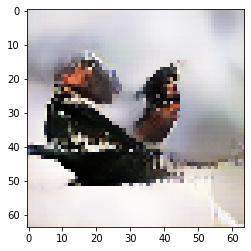

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 40

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 36.88511657714844 sec
Gen loss: 5.630519762271788, Gen valid loss: 1.3904006306718035, Gen attr loss: 4.240119132246106, Disc valid loss: 1.0532328694816526, Disc valid real loss: 0.5365314380263249, Disc valid fake loss: 0.5167014325052742, Disc attr loss: 7.933223948569156, Disc attr real loss: 3.6931048163230504, Disc attr fake loss: 4.240119132246106
Time for epoch 2 is 36.729751110076904 sec
Gen loss: 5.621866852933476, Gen valid loss: 1.3741776125863963, Gen attr loss: 4.247689232270569, Disc valid loss: 1.048944731068805, Disc valid real loss: 0.5365563405723106, Disc valid fake loss: 0.5123883916272057, Disc attr loss: 7.939768186429652, Disc attr real loss: 3.692078954159083, Disc attr fake loss: 4.247689232270569
Time for epoch 3 is 37.06473636627197 sec
Gen loss: 5.649103615665178, Gen valid loss: 1.3766787619125553, Gen attr loss: 4.272424

Time for epoch 23 is 36.972309827804565 sec
Gen loss: 5.617582910429172, Gen valid loss: 1.367319153253302, Gen attr loss: 4.250263743930393, Disc valid loss: 1.055658948292254, Disc valid real loss: 0.5415410125643257, Disc valid fake loss: 0.5141179347587471, Disc attr loss: 7.941084514788495, Disc attr real loss: 3.690820770858103, Disc attr fake loss: 4.250263743930393
Time for epoch 24 is 36.9344584941864 sec
Gen loss: 5.6439792832061855, Gen valid loss: 1.387202644735817, Gen attr loss: 4.256776634593643, Disc valid loss: 1.0418955822624165, Disc valid real loss: 0.5335743869061715, Disc valid fake loss: 0.5083211927717617, Disc attr loss: 7.947743680742052, Disc attr real loss: 3.6909670461484088, Disc attr fake loss: 4.256776634593643
Time for epoch 25 is 36.96766710281372 sec
Gen loss: 5.641219773589757, Gen valid loss: 1.4010853531560923, Gen attr loss: 4.240134422048967, Disc valid loss: 1.0366942493250053, Disc valid real loss: 0.5332090343401684, Disc valid fake loss: 0.50

Time for epoch 45 is 36.85855484008789 sec
Gen loss: 5.658910189217668, Gen valid loss: 1.3977067053802614, Gen attr loss: 4.261203489975554, Disc valid loss: 1.0391332644434157, Disc valid real loss: 0.5317183689373296, Disc valid fake loss: 0.5074148952637908, Disc attr loss: 7.948600329680818, Disc attr real loss: 3.687396839705263, Disc attr fake loss: 4.261203489975554
Time for epoch 46 is 36.88692331314087 sec
Gen loss: 5.638746243505297, Gen valid loss: 1.388053070885056, Gen attr loss: 4.250693181665932, Disc valid loss: 1.048066701669357, Disc valid real loss: 0.536558425281106, Disc valid fake loss: 0.5115082760651907, Disc attr loss: 7.937661119269808, Disc attr real loss: 3.6869679376038755, Disc attr fake loss: 4.250693181665932
Time for epoch 47 is 36.958526372909546 sec
Gen loss: 5.637481831599703, Gen valid loss: 1.4049103179275182, Gen attr loss: 4.23257150171895, Disc valid loss: 1.0372990595939036, Disc valid real loss: 0.5310588892559372, Disc valid fake loss: 0.506

Time for epoch 67 is 36.990456104278564 sec
Gen loss: 5.639041463857097, Gen valid loss: 1.3845867456459418, Gen attr loss: 4.25445470512721, Disc valid loss: 1.0475865083981335, Disc valid real loss: 0.5339630144398387, Disc valid fake loss: 0.513623490889221, Disc attr loss: 7.937780537256381, Disc attr real loss: 3.683325832129171, Disc attr fake loss: 4.25445470512721
Time for epoch 68 is 37.09828019142151 sec
Gen loss: 5.627675208942031, Gen valid loss: 1.3801669573719262, Gen attr loss: 4.247508249308682, Disc valid loss: 1.0510528342833687, Disc valid real loss: 0.5382812403566469, Disc valid fake loss: 0.5127715942497822, Disc attr loss: 7.932434879990451, Disc attr real loss: 3.6849266306817694, Disc attr fake loss: 4.247508249308682
Time for epoch 69 is 36.97824048995972 sec
Gen loss: 5.572944117755425, Gen valid loss: 1.3826633455953623, Gen attr loss: 4.190280779913512, Disc valid loss: 1.0492690845233639, Disc valid real loss: 0.5406606149705768, Disc valid fake loss: 0.50

Time for epoch 89 is 36.869616746902466 sec
Gen loss: 5.623604448830209, Gen valid loss: 1.3886038326635592, Gen attr loss: 4.235000612289925, Disc valid loss: 1.0418279851032144, Disc valid real loss: 0.5292724909659646, Disc valid fake loss: 0.5125554945410752, Disc attr loss: 7.9176967092322785, Disc attr real loss: 3.6826960969423537, Disc attr fake loss: 4.235000612289925
Time for epoch 90 is 36.89049220085144 sec
Gen loss: 5.6520186375150185, Gen valid loss: 1.4005004358162403, Gen attr loss: 4.251518201052658, Disc valid loss: 1.0344563680612622, Disc valid real loss: 0.5259329938307041, Disc valid fake loss: 0.5085233735844372, Disc attr loss: 7.930945347964279, Disc attr real loss: 3.679427146911621, Disc attr fake loss: 4.251518201052658
Time for epoch 91 is 36.93679881095886 sec
Gen loss: 5.670393609096041, Gen valid loss: 1.4015933585360767, Gen attr loss: 4.26880025475975, Disc valid loss: 1.0408018924356477, Disc valid real loss: 0.5313676508461557, Disc valid fake loss: 

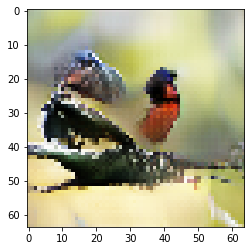

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 41

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 36.97557997703552 sec
Gen loss: 5.634403889095234, Gen valid loss: 1.384223616543178, Gen attr loss: 4.250180270290633, Disc valid loss: 1.0490329081450052, Disc valid real loss: 0.5375314066565133, Disc valid fake loss: 0.5115015010039011, Disc attr loss: 7.931569182129733, Disc attr real loss: 3.6813889118391, Disc attr fake loss: 4.250180270290633
Time for epoch 2 is 36.737794399261475 sec
Gen loss: 5.646049533110001, Gen valid loss: 1.3787278505521738, Gen attr loss: 4.267321688695975, Disc valid loss: 1.047541487669234, Disc valid real loss: 0.5337283208279752, Disc valid fake loss: 0.5138131682142656, Disc attr loss: 7.946891549479994, Disc attr real loss: 3.679569860784019, Disc attr fake loss: 4.267321688695975
Time for epoch 3 is 37.050174713134766 sec
Gen loss: 5.63794268114457, Gen valid loss: 1.3913562165366278, Gen attr loss: 4.2465864694

Time for epoch 23 is 36.93933868408203 sec
Gen loss: 5.580363760795697, Gen valid loss: 1.3704550767009498, Gen attr loss: 4.209908675372116, Disc valid loss: 1.0563105774442678, Disc valid real loss: 0.5376063019118011, Disc valid fake loss: 0.5187042748055807, Disc attr loss: 7.89047715915897, Disc attr real loss: 3.680568483786854, Disc attr fake loss: 4.209908675372116
Time for epoch 24 is 36.927401542663574 sec
Gen loss: 5.580314080566572, Gen valid loss: 1.3783360050945748, Gen attr loss: 4.201978084517688, Disc valid loss: 1.049242943283019, Disc valid real loss: 0.5369622877781307, Disc valid fake loss: 0.5122806535665259, Disc attr loss: 7.879192921527356, Disc attr real loss: 3.6772148370096676, Disc attr fake loss: 4.201978084517688
Time for epoch 25 is 36.93755626678467 sec
Gen loss: 5.623658896138674, Gen valid loss: 1.384491799000479, Gen attr loss: 4.239167083569659, Disc valid loss: 1.0424009212633458, Disc valid real loss: 0.5351515544785393, Disc valid fake loss: 0.50

Time for epoch 45 is 36.947036266326904 sec
Gen loss: 5.610459357419312, Gen valid loss: 1.3860827737707433, Gen attr loss: 4.224376592532729, Disc valid loss: 1.0405335363333788, Disc valid real loss: 0.5318748395294355, Disc valid fake loss: 0.508658694946346, Disc attr loss: 7.899325514227394, Disc attr real loss: 3.674948921694665, Disc attr fake loss: 4.224376592532729
Time for epoch 46 is 36.918272256851196 sec
Gen loss: 5.623286717629368, Gen valid loss: 1.3899168871282561, Gen attr loss: 4.233369822101541, Disc valid loss: 1.0472633877420814, Disc valid real loss: 0.5330879285245084, Disc valid fake loss: 0.5141754605905796, Disc attr loss: 7.908920633760571, Disc attr real loss: 3.6755508116590296, Disc attr fake loss: 4.233369822101541
Time for epoch 47 is 37.12042284011841 sec
Gen loss: 5.629939899858098, Gen valid loss: 1.3997929432204745, Gen attr loss: 4.2301469618065894, Disc valid loss: 1.0373039536359834, Disc valid real loss: 0.5328058322593772, Disc valid fake loss: 

Time for epoch 67 is 36.92606496810913 sec
Gen loss: 5.587078373606612, Gen valid loss: 1.3740010721896723, Gen attr loss: 4.213077308039678, Disc valid loss: 1.0441685537012613, Disc valid real loss: 0.537219529229451, Disc valid fake loss: 0.5069490247141055, Disc attr loss: 7.887382988684223, Disc attr real loss: 3.6743056806445447, Disc attr fake loss: 4.213077308039678
Time for epoch 68 is 36.89737677574158 sec
Gen loss: 5.587393181756906, Gen valid loss: 1.3778343510821582, Gen attr loss: 4.209558811937244, Disc valid loss: 1.057160227279353, Disc valid real loss: 0.5407816396980751, Disc valid fake loss: 0.5163785876620429, Disc attr loss: 7.882666234401507, Disc attr real loss: 3.673107422464262, Disc attr fake loss: 4.209558811937244
Time for epoch 69 is 36.88620114326477 sec
Gen loss: 5.596834658284174, Gen valid loss: 1.3692432651674844, Gen attr loss: 4.227591391178327, Disc valid loss: 1.0518400279810112, Disc valid real loss: 0.5393671199558226, Disc valid fake loss: 0.51

Time for epoch 89 is 36.926316022872925 sec
Gen loss: 5.622359708718814, Gen valid loss: 1.3693916141825317, Gen attr loss: 4.252968102612793, Disc valid loss: 1.0543200331651745, Disc valid real loss: 0.5404178777199774, Disc valid fake loss: 0.5139021534260696, Disc attr loss: 7.922538147386174, Disc attr real loss: 3.669570044773381, Disc attr fake loss: 4.252968102612793
Time for epoch 90 is 36.884050607681274 sec
Gen loss: 5.611776716340848, Gen valid loss: 1.3823743906770618, Gen attr loss: 4.229402317910337, Disc valid loss: 1.0434912288092015, Disc valid real loss: 0.5324415529000404, Disc valid fake loss: 0.5110496745361546, Disc attr loss: 7.89944517386315, Disc attr real loss: 3.6700428559528135, Disc attr fake loss: 4.229402317910337
Time for epoch 91 is 36.868019342422485 sec
Gen loss: 5.593096329913876, Gen valid loss: 1.3726728951058738, Gen attr loss: 4.22042343286964, Disc valid loss: 1.0549175044708459, Disc valid real loss: 0.540025134477512, Disc valid fake loss: 0.

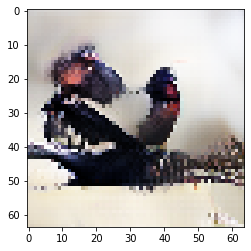

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 42

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 36.76483201980591 sec
Gen loss: 5.6060998032732705, Gen valid loss: 1.3659653463337802, Gen attr loss: 4.240134438201987, Disc valid loss: 1.0623671076485135, Disc valid real loss: 0.5432361513780062, Disc valid fake loss: 0.5191309546552053, Disc attr loss: 7.909380145835359, Disc attr real loss: 3.6692457076333724, Disc attr fake loss: 4.240134438201987
Time for epoch 2 is 36.96529936790466 sec
Gen loss: 5.595802071940931, Gen valid loss: 1.3699263734869194, Gen attr loss: 4.225875696192589, Disc valid loss: 1.0528568147320734, Disc valid real loss: 0.5383210156345108, Disc valid fake loss: 0.5145357944131866, Disc attr loss: 7.893330532683913, Disc attr real loss: 3.6674548364913235, Disc attr fake loss: 4.225875696192589
Time for epoch 3 is 36.8911497592926 sec
Gen loss: 5.588994036522015, Gen valid loss: 1.3805540657948026, Gen attr loss: 4.20843

Time for epoch 23 is 36.84802865982056 sec
Gen loss: 5.6361022615820415, Gen valid loss: 1.3940845618079993, Gen attr loss: 4.242017708496673, Disc valid loss: 1.0471522987373476, Disc valid real loss: 0.5364949379348496, Disc valid fake loss: 0.5106573605602026, Disc attr loss: 7.90939250160362, Disc attr real loss: 3.6673747931069474, Disc attr fake loss: 4.242017708496673
Time for epoch 24 is 36.89974665641785 sec
Gen loss: 5.615096835263053, Gen valid loss: 1.3896922990881653, Gen attr loss: 4.225404523575532, Disc valid loss: 1.042193936623209, Disc valid real loss: 0.5319305633303273, Disc valid fake loss: 0.5102633725659957, Disc attr loss: 7.890501541819999, Disc attr real loss: 3.6650970182444667, Disc attr fake loss: 4.225404523575532
Time for epoch 25 is 36.843727111816406 sec
Gen loss: 5.577335276254794, Gen valid loss: 1.3863435528142665, Gen attr loss: 4.190991720856044, Disc valid loss: 1.0453287036761358, Disc valid real loss: 0.5358579696678534, Disc valid fake loss: 0

Time for epoch 45 is 36.84424352645874 sec
Gen loss: 5.609997088993145, Gen valid loss: 1.3966483556158173, Gen attr loss: 4.2133487253008175, Disc valid loss: 1.0353977510599586, Disc valid real loss: 0.5332653652523268, Disc valid fake loss: 0.5021323887959406, Disc attr loss: 7.87742367023375, Disc attr real loss: 3.6640749449329326, Disc attr fake loss: 4.2133487253008175
Time for epoch 46 is 36.731332778930664 sec
Gen loss: 5.5793475885055255, Gen valid loss: 1.3877534213750988, Gen attr loss: 4.191594162607581, Disc valid loss: 1.0514286766207315, Disc valid real loss: 0.5362115071071842, Disc valid fake loss: 0.5152171717749702, Disc attr loss: 7.855493951296095, Disc attr real loss: 3.6638997886885147, Disc attr fake loss: 4.191594162607581
Time for epoch 47 is 36.784926652908325 sec
Gen loss: 5.607186834340496, Gen valid loss: 1.3768408356643305, Gen attr loss: 4.230346003845132, Disc valid loss: 1.0483553647025814, Disc valid real loss: 0.5353844911263888, Disc valid fake los

Time for epoch 67 is 36.95058608055115 sec
Gen loss: 5.598946699282018, Gen valid loss: 1.3896503390335455, Gen attr loss: 4.20929634215709, Disc valid loss: 1.0448717155107639, Disc valid real loss: 0.5351273594348411, Disc valid fake loss: 0.5097443533299092, Disc attr loss: 7.872990849864515, Disc attr real loss: 3.6636945077074254, Disc attr fake loss: 4.20929634215709
Time for epoch 68 is 36.8226318359375 sec
Gen loss: 5.575427695018489, Gen valid loss: 1.3773776787083323, Gen attr loss: 4.198050009202828, Disc valid loss: 1.0517007621323191, Disc valid real loss: 0.5375574062348705, Disc valid fake loss: 0.5141433574319855, Disc attr loss: 7.860850241772204, Disc attr real loss: 3.6628002325693765, Disc attr fake loss: 4.198050009202828
Time for epoch 69 is 36.96532845497131 sec
Gen loss: 5.593558356690859, Gen valid loss: 1.379743891841351, Gen attr loss: 4.213814457580649, Disc valid loss: 1.0484170265960175, Disc valid real loss: 0.5361371381172966, Disc valid fake loss: 0.512

Time for epoch 89 is 36.92770195007324 sec
Gen loss: 5.609848264110121, Gen valid loss: 1.3945288790596857, Gen attr loss: 4.215319395711428, Disc valid loss: 1.0387234411588528, Disc valid real loss: 0.5305782005715822, Disc valid fake loss: 0.5081452412333914, Disc attr loss: 7.8777847193120945, Disc attr real loss: 3.6624653236006655, Disc attr fake loss: 4.215319395711428
Time for epoch 90 is 36.92194724082947 sec
Gen loss: 5.609162366810207, Gen valid loss: 1.3852649710688811, Gen attr loss: 4.223897391864601, Disc valid loss: 1.0513374679456882, Disc valid real loss: 0.5397559689473976, Disc valid fake loss: 0.5115814963330422, Disc attr loss: 7.88584025700887, Disc attr real loss: 3.6619428651442694, Disc attr fake loss: 4.223897391864601
Time for epoch 91 is 36.88472366333008 sec
Gen loss: 5.572786784753567, Gen valid loss: 1.388122933989941, Gen attr loss: 4.18466385399423, Disc valid loss: 1.0438724942000577, Disc valid real loss: 0.5341747428989669, Disc valid fake loss: 0.5

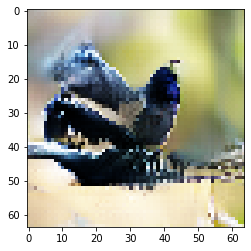

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 43

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 37.089998960494995 sec
Gen loss: 5.595209762655946, Gen valid loss: 1.3834329914594408, Gen attr loss: 4.211776759889391, Disc valid loss: 1.052244059600158, Disc valid real loss: 0.5350922791130821, Disc valid fake loss: 0.5171517806486062, Disc attr loss: 7.8717626097402595, Disc attr real loss: 3.659985849850869, Disc attr fake loss: 4.211776759889391
Time for epoch 2 is 37.13726329803467 sec
Gen loss: 5.58568039819154, Gen valid loss: 1.3774810435003058, Gen attr loss: 4.2081993731056775, Disc valid loss: 1.048610959595781, Disc valid real loss: 0.5356840595481841, Disc valid fake loss: 0.5129269000475969, Disc attr loss: 7.867692763243264, Disc attr real loss: 3.659493390137587, Disc attr fake loss: 4.2081993731056775
Time for epoch 3 is 37.06028413772583 sec
Gen loss: 5.63250775453521, Gen valid loss: 1.3969448930848904, Gen attr loss: 4.2355628

Time for epoch 23 is 37.07247805595398 sec
Gen loss: 5.617962928968393, Gen valid loss: 1.3953310328770459, Gen attr loss: 4.222631894476045, Disc valid loss: 1.0443484074055018, Disc valid real loss: 0.5332433313212097, Disc valid fake loss: 0.5111050780226545, Disc attr loss: 7.87952833511642, Disc attr real loss: 3.6568964406403746, Disc attr fake loss: 4.222631894476045
Time for epoch 24 is 37.59010624885559 sec
Gen loss: 5.60726815122899, Gen valid loss: 1.385196907733514, Gen attr loss: 4.222071260617677, Disc valid loss: 1.0437603573488996, Disc valid real loss: 0.5328173388633625, Disc valid fake loss: 0.5109430176778861, Disc attr loss: 7.879515592967914, Disc attr real loss: 3.6574443323502375, Disc attr fake loss: 4.222071260617677
Time for epoch 25 is 37.18112516403198 sec
Gen loss: 5.559504260861777, Gen valid loss: 1.3715366916604805, Gen attr loss: 4.187967571785779, Disc valid loss: 1.0512937690184367, Disc valid real loss: 0.5319962978847628, Disc valid fake loss: 0.51

Time for epoch 45 is 37.262624740600586 sec
Gen loss: 5.566425521199296, Gen valid loss: 1.3546517966239433, Gen attr loss: 4.211773713429769, Disc valid loss: 1.0611101623150068, Disc valid real loss: 0.5440886088503085, Disc valid fake loss: 0.517021554030054, Disc attr loss: 7.86742048922593, Disc attr real loss: 3.6556467757961615, Disc attr fake loss: 4.211773713429769
Time for epoch 46 is 37.09226894378662 sec
Gen loss: 5.543036388510934, Gen valid loss: 1.3702016135218344, Gen attr loss: 4.1728347866192745, Disc valid loss: 1.0585088720166587, Disc valid real loss: 0.5450280120540764, Disc valid fake loss: 0.5134808577011595, Disc attr loss: 7.828846990900634, Disc attr real loss: 3.65601220428136, Disc attr fake loss: 4.1728347866192745
Time for epoch 47 is 36.97705841064453 sec
Gen loss: 5.617993995749208, Gen valid loss: 1.3919189302578852, Gen attr loss: 4.226075070983349, Disc valid loss: 1.0412581477384903, Disc valid real loss: 0.5347976120829905, Disc valid fake loss: 0.

Time for epoch 67 is 37.19464945793152 sec
Gen loss: 5.592392692720987, Gen valid loss: 1.3901145723130968, Gen attr loss: 4.20227812816134, Disc valid loss: 1.0401708948902968, Disc valid real loss: 0.5325828641249235, Disc valid fake loss: 0.5075880291500712, Disc attr loss: 7.856469735866639, Disc attr real loss: 3.6541916077053, Disc attr fake loss: 4.20227812816134
Time for epoch 68 is 37.1428279876709 sec
Gen loss: 5.582718735464867, Gen valid loss: 1.3741560327974438, Gen attr loss: 4.20856270880557, Disc valid loss: 1.0566913093008645, Disc valid real loss: 0.5378058803113819, Disc valid fake loss: 0.5188854293933083, Disc attr loss: 7.862668973643605, Disc attr real loss: 3.654106264838035, Disc attr fake loss: 4.20856270880557
Time for epoch 69 is 37.15522885322571 sec
Gen loss: 5.631075371894733, Gen valid loss: 1.39089584415198, Gen attr loss: 4.240179527742753, Disc valid loss: 1.0399934323176458, Disc valid real loss: 0.5359377994285366, Disc valid fake loss: 0.5040556325

Time for epoch 89 is 37.33752703666687 sec
Gen loss: 5.603990269224172, Gen valid loss: 1.3748463500482926, Gen attr loss: 4.229143920629651, Disc valid loss: 1.04964746450021, Disc valid real loss: 0.5354792900524812, Disc valid fake loss: 0.5141681743669639, Disc attr loss: 7.882352087878923, Disc attr real loss: 3.653208167249271, Disc attr fake loss: 4.229143920629651
Time for epoch 90 is 37.1269793510437 sec
Gen loss: 5.605632111309021, Gen valid loss: 1.3801860693024426, Gen attr loss: 4.2254460361914905, Disc valid loss: 1.0443077904745168, Disc valid real loss: 0.5335881798894102, Disc valid fake loss: 0.5107196111504625, Disc attr loss: 7.877277621085728, Disc attr real loss: 3.651831584894237, Disc attr fake loss: 4.2254460361914905
Time for epoch 91 is 37.44502401351929 sec
Gen loss: 5.575843596523047, Gen valid loss: 1.4045209538968921, Gen attr loss: 4.171322632611282, Disc valid loss: 1.0386709887483903, Disc valid real loss: 0.5297544334477525, Disc valid fake loss: 0.50

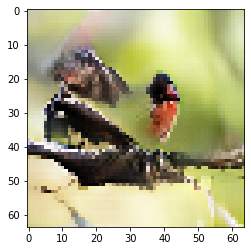

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 44

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 37.09347867965698 sec
Gen loss: 5.5990225499884545, Gen valid loss: 1.386767919147564, Gen attr loss: 4.212254634071495, Disc valid loss: 1.0532481101793325, Disc valid real loss: 0.535165701374452, Disc valid fake loss: 0.5180824108240081, Disc attr loss: 7.8606865431881205, Disc attr real loss: 3.648431909116626, Disc attr fake loss: 4.212254634071495
Time for epoch 2 is 37.378602027893066 sec
Gen loss: 5.5966052853964205, Gen valid loss: 1.3761410726118217, Gen attr loss: 4.220464200508304, Disc valid loss: 1.049493376317063, Disc valid real loss: 0.5366002224325165, Disc valid fake loss: 0.5128931521077144, Disc attr loss: 7.866170012207858, Disc attr real loss: 3.6457058116995547, Disc attr fake loss: 4.220464200508304
Time for epoch 3 is 37.146867513656616 sec
Gen loss: 5.561692135766916, Gen valid loss: 1.3724473323925401, Gen attr loss: 4.1892

Time for epoch 23 is 37.38819193840027 sec
Gen loss: 5.568688433990892, Gen valid loss: 1.3805744302305103, Gen attr loss: 4.188114015067496, Disc valid loss: 1.0593133268317556, Disc valid real loss: 0.5385786055872434, Disc valid fake loss: 0.5207347189023243, Disc attr loss: 7.809363251456078, Disc attr real loss: 3.6212492363885813, Disc attr fake loss: 4.188114015067496
Time for epoch 24 is 37.388362884521484 sec
Gen loss: 5.5350010130140515, Gen valid loss: 1.359334020918301, Gen attr loss: 4.175667002918274, Disc valid loss: 1.0547676958688876, Disc valid real loss: 0.5369391546339847, Disc valid fake loss: 0.5178285410733727, Disc attr loss: 7.7949209613851735, Disc attr real loss: 3.6192539584668992, Disc attr fake loss: 4.175667002918274
Time for epoch 25 is 37.340174198150635 sec
Gen loss: 5.533929023639296, Gen valid loss: 1.366481177205962, Gen attr loss: 4.167447855802086, Disc valid loss: 1.0529140870422529, Disc valid real loss: 0.5367032127167152, Disc valid fake loss:

Time for epoch 45 is 37.26940202713013 sec
Gen loss: 5.577581228602546, Gen valid loss: 1.3781974276876061, Gen attr loss: 4.199383796392095, Disc valid loss: 1.0478758652035782, Disc valid real loss: 0.5360137841242761, Disc valid fake loss: 0.511862080917772, Disc attr loss: 7.804664046460697, Disc attr real loss: 3.6052802500686023, Disc attr fake loss: 4.199383796392095
Time for epoch 46 is 37.369266748428345 sec
Gen loss: 5.586759842508208, Gen valid loss: 1.367147877772003, Gen attr loss: 4.219611961990191, Disc valid loss: 1.061991526990079, Disc valid real loss: 0.5439756294576134, Disc valid fake loss: 0.5180158969671099, Disc attr loss: 7.825884657500559, Disc attr real loss: 3.606272695510368, Disc attr fake loss: 4.219611961990191
Time for epoch 47 is 37.64682674407959 sec
Gen loss: 5.57845062938163, Gen valid loss: 1.386247844230838, Gen attr loss: 4.192202790319758, Disc valid loss: 1.0413097212631204, Disc valid real loss: 0.5313955335436151, Disc valid fake loss: 0.5099

Time for epoch 67 is 37.45601749420166 sec
Gen loss: 5.581575274790529, Gen valid loss: 1.3987761063950495, Gen attr loss: 4.1827991654879355, Disc valid loss: 1.044441175008531, Disc valid real loss: 0.5309290368220994, Disc valid fake loss: 0.5135121396402034, Disc attr loss: 7.781053341501128, Disc attr real loss: 3.598254176013192, Disc attr fake loss: 4.1827991654879355
Time for epoch 68 is 37.43024706840515 sec
Gen loss: 5.572208873624724, Gen valid loss: 1.3704016286183178, Gen attr loss: 4.201807250821494, Disc valid loss: 1.0519422665844118, Disc valid real loss: 0.5333588918857781, Disc valid fake loss: 0.5185833738102177, Disc attr loss: 7.798119373760895, Disc attr real loss: 3.596312122939402, Disc attr fake loss: 4.201807250821494
Time for epoch 69 is 37.463013887405396 sec
Gen loss: 5.61229339201599, Gen valid loss: 1.3880188238976126, Gen attr loss: 4.224274564241652, Disc valid loss: 1.0475829322809773, Disc valid real loss: 0.5349386488680594, Disc valid fake loss: 0.

Time for epoch 89 is 37.52572751045227 sec
Gen loss: 5.584191531669803, Gen valid loss: 1.385899319881346, Gen attr loss: 4.198292209527033, Disc valid loss: 1.040781013203184, Disc valid real loss: 0.5280508628382592, Disc valid fake loss: 0.5127301508495155, Disc attr loss: 7.786822866941209, Disc attr real loss: 3.588530657414175, Disc attr fake loss: 4.198292209527033
Time for epoch 90 is 37.47311186790466 sec
Gen loss: 5.594365020431477, Gen valid loss: 1.3920368414907274, Gen attr loss: 4.202328178617689, Disc valid loss: 1.0468263821550179, Disc valid real loss: 0.5355014838984988, Disc valid fake loss: 0.5113248976103981, Disc attr loss: 7.790264235602485, Disc attr real loss: 3.5879360569847956, Disc attr fake loss: 4.202328178617689
Time for epoch 91 is 37.53289580345154 sec
Gen loss: 5.539656269518018, Gen valid loss: 1.383432622524458, Gen attr loss: 4.156223651839466, Disc valid loss: 1.047627444674329, Disc valid real loss: 0.5375329970828886, Disc valid fake loss: 0.5100

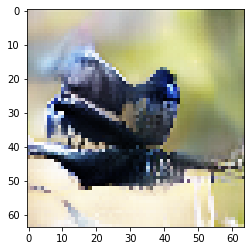

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 45

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 37.63121199607849 sec
Gen loss: 5.559961866880174, Gen valid loss: 1.3700014068505306, Gen attr loss: 4.189960471982879, Disc valid loss: 1.055454047876322, Disc valid real loss: 0.5416491839297741, Disc valid fake loss: 0.5138048645119034, Disc attr loss: 7.77701899740431, Disc attr real loss: 3.587058525421432, Disc attr fake loss: 4.189960471982879
Time for epoch 2 is 37.376227378845215 sec
Gen loss: 5.618531015184191, Gen valid loss: 1.4047931901161588, Gen attr loss: 4.2137378205451865, Disc valid loss: 1.0379734523897248, Disc valid real loss: 0.5322517797875856, Disc valid fake loss: 0.5057216730059647, Disc attr loss: 7.800006284300228, Disc attr real loss: 3.5862684637550415, Disc attr fake loss: 4.2137378205451865
Time for epoch 3 is 37.760268449783325 sec
Gen loss: 5.579825914326076, Gen valid loss: 1.3937646822554632, Gen attr loss: 4.1860

Time for epoch 23 is 37.60853123664856 sec
Gen loss: 5.5988273155398485, Gen valid loss: 1.398683762485742, Gen attr loss: 4.200143554346348, Disc valid loss: 1.0484026505695125, Disc valid real loss: 0.5328094187144664, Disc valid fake loss: 0.5155932302397441, Disc attr loss: 7.780469423387109, Disc attr real loss: 3.5803258690407604, Disc attr fake loss: 4.200143554346348
Time for epoch 24 is 37.67835545539856 sec
Gen loss: 5.596023679748783, Gen valid loss: 1.3831458692628193, Gen attr loss: 4.212877804670876, Disc valid loss: 1.0480428415585339, Disc valid real loss: 0.5373138908125198, Disc valid fake loss: 0.5107289498575981, Disc attr loss: 7.790761066969171, Disc attr real loss: 3.5778832622982946, Disc attr fake loss: 4.212877804670876
Time for epoch 25 is 37.63746619224548 sec
Gen loss: 5.577138715966284, Gen valid loss: 1.3934666916606873, Gen attr loss: 4.183672023013355, Disc valid loss: 1.0410693648061777, Disc valid real loss: 0.5338569348905144, Disc valid fake loss: 0

Time for epoch 45 is 37.624553203582764 sec
Gen loss: 5.582290268202784, Gen valid loss: 1.3835683364855242, Gen attr loss: 4.198721935432455, Disc valid loss: 1.0482287729981792, Disc valid real loss: 0.5332701196515464, Disc valid fake loss: 0.5149586547196396, Disc attr loss: 7.7689276051715135, Disc attr real loss: 3.570205669739059, Disc attr fake loss: 4.198721935432455
Time for epoch 46 is 37.5992374420166 sec
Gen loss: 5.545765166037128, Gen valid loss: 1.3809331384131578, Gen attr loss: 4.16483201954746, Disc valid loss: 1.0508080013399201, Disc valid real loss: 0.5356021356291887, Disc valid fake loss: 0.5152058668414429, Disc attr loss: 7.7366164027836914, Disc attr real loss: 3.5717843832362313, Disc attr fake loss: 4.16483201954746
Time for epoch 47 is 37.66848969459534 sec
Gen loss: 5.544789652837324, Gen valid loss: 1.3937363233669664, Gen attr loss: 4.151053337546868, Disc valid loss: 1.0399303473431243, Disc valid real loss: 0.5352018739634413, Disc valid fake loss: 0.

Time for epoch 67 is 37.733665466308594 sec
Gen loss: 5.502980849930265, Gen valid loss: 1.3814964575496147, Gen attr loss: 4.12148439205759, Disc valid loss: 1.0494658817766804, Disc valid real loss: 0.5379835531155914, Disc valid fake loss: 0.5114823278534381, Disc attr loss: 7.68748267039374, Disc attr real loss: 3.56599827833615, Disc attr fake loss: 4.12148439205759
Time for epoch 68 is 37.755552530288696 sec
Gen loss: 5.569246337342714, Gen valid loss: 1.3828106915078513, Gen attr loss: 4.186435638081414, Disc valid loss: 1.0533584461302614, Disc valid real loss: 0.5416461910981796, Disc valid fake loss: 0.5117122532552497, Disc attr loss: 7.750987202817509, Disc attr real loss: 3.564551564736095, Disc attr fake loss: 4.186435638081414
Time for epoch 69 is 37.80477523803711 sec
Gen loss: 5.573204262792903, Gen valid loss: 1.3921581713487785, Gen attr loss: 4.1810460904749425, Disc valid loss: 1.043352373893345, Disc valid real loss: 0.5322372066134683, Disc valid fake loss: 0.511

Time for epoch 89 is 37.741938829422 sec
Gen loss: 5.560104103915414, Gen valid loss: 1.386591303962356, Gen attr loss: 4.173512788322883, Disc valid loss: 1.0480157855726515, Disc valid real loss: 0.5349354319133086, Disc valid fake loss: 0.5130803519632758, Disc attr loss: 7.733641864807625, Disc attr real loss: 3.5601290764847424, Disc attr fake loss: 4.173512788322883
Time for epoch 90 is 37.723676919937134 sec
Gen loss: 5.572430251413568, Gen valid loss: 1.4060962649218758, Gen attr loss: 4.166333987460873, Disc valid loss: 1.0351645331072614, Disc valid real loss: 0.5280796742536188, Disc valid fake loss: 0.5070848562691593, Disc attr loss: 7.725604240164201, Disc attr real loss: 3.559270252703328, Disc attr fake loss: 4.166333987460873
Time for epoch 91 is 37.7888822555542 sec
Gen loss: 5.546608507471679, Gen valid loss: 1.395913893614358, Gen attr loss: 4.150694618380166, Disc valid loss: 1.0498527777873403, Disc valid real loss: 0.535614336489985, Disc valid fake loss: 0.51423

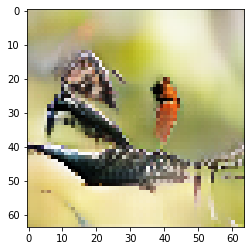

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 46

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 37.77512812614441 sec
Gen loss: 5.577614789409689, Gen valid loss: 1.39500454544698, Gen attr loss: 4.182610239762924, Disc valid loss: 1.0427190543513312, Disc valid real loss: 0.5320810517321434, Disc valid fake loss: 0.5106380018115366, Disc attr loss: 7.7401696918456535, Disc attr real loss: 3.5575594520827294, Disc attr fake loss: 4.182610239762924
Time for epoch 2 is 37.734625577926636 sec
Gen loss: 5.534278901934947, Gen valid loss: 1.3829553983398892, Gen attr loss: 4.151323515548293, Disc valid loss: 1.0484851295062843, Disc valid real loss: 0.5373882186929708, Disc valid fake loss: 0.5110969083095954, Disc attr loss: 7.705969813716444, Disc attr real loss: 3.5546462981681515, Disc attr fake loss: 4.151323515548293
Time for epoch 3 is 37.711780071258545 sec
Gen loss: 5.580568234771894, Gen valid loss: 1.3974045217844853, Gen attr loss: 4.1831

Time for epoch 23 is 37.78936505317688 sec
Gen loss: 5.53910332062057, Gen valid loss: 1.3999016410936185, Gen attr loss: 4.1392016753271665, Disc valid loss: 1.0435107922166345, Disc valid real loss: 0.5318355409271995, Disc valid fake loss: 0.5116752487857167, Disc attr loss: 7.695820040819122, Disc attr real loss: 3.5566183654919548, Disc attr fake loss: 4.1392016753271665
Time for epoch 24 is 37.747742891311646 sec
Gen loss: 5.528928624905221, Gen valid loss: 1.3996430031329312, Gen attr loss: 4.1292856269412574, Disc valid loss: 1.0413210245005806, Disc valid real loss: 0.5316951462246862, Disc valid fake loss: 0.5096258790027804, Disc attr loss: 7.68489219631929, Disc attr real loss: 3.5556065693780337, Disc attr fake loss: 4.1292856269412574
Time for epoch 25 is 37.746365547180176 sec
Gen loss: 5.549781947924193, Gen valid loss: 1.3986230091996956, Gen attr loss: 4.1511589350093026, Disc valid loss: 1.0358113463978134, Disc valid real loss: 0.5270255514115176, Disc valid fake lo

Time for epoch 45 is 37.750590801239014 sec
Gen loss: 5.521876791305335, Gen valid loss: 1.3824467878677658, Gen attr loss: 4.139430003437569, Disc valid loss: 1.0448066188390985, Disc valid real loss: 0.5283001889865896, Disc valid fake loss: 0.5165064294486834, Disc attr loss: 7.68282509883891, Disc attr real loss: 3.54339509540134, Disc attr fake loss: 4.139430003437569
Time for epoch 46 is 37.73478817939758 sec
Gen loss: 5.549440228842138, Gen valid loss: 1.3909239177781392, Gen attr loss: 4.158516313325422, Disc valid loss: 1.0516328160678792, Disc valid real loss: 0.5414663902950804, Disc valid fake loss: 0.5101664244805572, Disc attr loss: 7.703766509446348, Disc attr real loss: 3.5452501961209264, Disc attr fake loss: 4.158516313325422
Time for epoch 47 is 37.75843048095703 sec
Gen loss: 5.523364984569188, Gen valid loss: 1.387007454223426, Gen attr loss: 4.1363575277612785, Disc valid loss: 1.0420380864686114, Disc valid real loss: 0.5322102968931844, Disc valid fake loss: 0.5

Time for epoch 67 is 37.66216015815735 sec
Gen loss: 5.516787361000288, Gen valid loss: 1.3817785677871084, Gen attr loss: 4.135008798382146, Disc valid loss: 1.0491198688987795, Disc valid real loss: 0.5363202879260872, Disc valid fake loss: 0.5127995843648264, Disc attr loss: 7.672683288734457, Disc attr real loss: 3.5376744903523103, Disc attr fake loss: 4.135008798382146
Time for epoch 68 is 37.47031354904175 sec
Gen loss: 5.537517492041032, Gen valid loss: 1.3958858316183735, Gen attr loss: 4.141631663330203, Disc valid loss: 1.0468090010206228, Disc valid real loss: 0.537513075886057, Disc valid fake loss: 0.5092959261845121, Disc attr loss: 7.676623406448985, Disc attr real loss: 3.5349917431187823, Disc attr fake loss: 4.141631663330203
Time for epoch 69 is 37.356196880340576 sec
Gen loss: 5.523835989840955, Gen valid loss: 1.3987040942923485, Gen attr loss: 4.125131886825975, Disc valid loss: 1.0374252666948933, Disc valid real loss: 0.5274821679766585, Disc valid fake loss: 0

Time for epoch 89 is 37.36130237579346 sec
Gen loss: 5.539417194480173, Gen valid loss: 1.3912703341584864, Gen attr loss: 4.148146859998626, Disc valid loss: 1.044163527042885, Disc valid real loss: 0.5325793418780898, Disc valid fake loss: 0.5115841867800973, Disc attr loss: 7.6762472762648, Disc attr real loss: 3.528100416266175, Disc attr fake loss: 4.148146859998626
Time for epoch 90 is 37.38229465484619 sec
Gen loss: 5.555023826557769, Gen valid loss: 1.3942861091799852, Gen attr loss: 4.160737714793301, Disc valid loss: 1.0413027043911176, Disc valid real loss: 0.5291968444337044, Disc valid fake loss: 0.5121058610881247, Disc attr loss: 7.689530124509238, Disc attr real loss: 3.528792409715937, Disc attr fake loss: 4.160737714793301
Time for epoch 91 is 37.34134244918823 sec
Gen loss: 5.558392584162353, Gen valid loss: 1.3919009810217673, Gen attr loss: 4.166491599586921, Disc valid loss: 1.048248810012166, Disc valid real loss: 0.53568591754934, Disc valid fake loss: 0.5125628

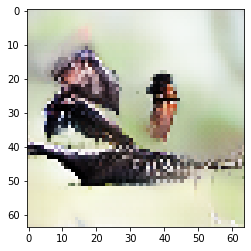

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 47

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 37.346271276474 sec
Gen loss: 5.5300381409766555, Gen valid loss: 1.3785347184191552, Gen attr loss: 4.151503417550064, Disc valid loss: 1.0509162034768722, Disc valid real loss: 0.5363030603261498, Disc valid fake loss: 0.5146131432314875, Disc attr loss: 7.675024984974848, Disc attr real loss: 3.5235215674247846, Disc attr fake loss: 4.151503417550064
Time for epoch 2 is 37.33996272087097 sec
Gen loss: 5.557956739492856, Gen valid loss: 1.3965272273474592, Gen attr loss: 4.161429516345182, Disc valid loss: 1.0433235221761998, Disc valid real loss: 0.5302372681416148, Disc valid fake loss: 0.5130862559729475, Disc attr loss: 7.685957610768678, Disc attr real loss: 3.524528094423496, Disc attr fake loss: 4.161429516345182
Time for epoch 3 is 37.3922963142395 sec
Gen loss: 5.591001978411584, Gen valid loss: 1.4119446872049555, Gen attr loss: 4.17905728

Time for epoch 23 is 37.408793210983276 sec
Gen loss: 5.5479575069293094, Gen valid loss: 1.3977275569910603, Gen attr loss: 4.150229956076397, Disc valid loss: 1.041318414172506, Disc valid real loss: 0.5343737065145963, Disc valid fake loss: 0.5069447089501513, Disc attr loss: 7.668950040812092, Disc attr real loss: 3.5187200847356945, Disc attr fake loss: 4.150229956076397
Time for epoch 24 is 37.289146900177 sec
Gen loss: 5.547174407214653, Gen valid loss: 1.3912267190654104, Gen attr loss: 4.155947684595579, Disc valid loss: 1.045153734483693, Disc valid real loss: 0.5352081169442433, Disc valid fake loss: 0.5099456186701612, Disc attr loss: 7.674073188285518, Disc attr real loss: 3.518125503689939, Disc attr fake loss: 4.155947684595579
Time for epoch 25 is 37.58932900428772 sec
Gen loss: 5.536203889665888, Gen valid loss: 1.3915722402453745, Gen attr loss: 4.144631647482151, Disc valid loss: 1.0421924865665797, Disc valid real loss: 0.5341075704026674, Disc valid fake loss: 0.50

Time for epoch 45 is 37.55843734741211 sec
Gen loss: 5.563884707970348, Gen valid loss: 1.4070468927786601, Gen attr loss: 4.156837823914318, Disc valid loss: 1.0340594182492595, Disc valid real loss: 0.5288706932287552, Disc valid fake loss: 0.5051887270396318, Disc attr loss: 7.668248515142012, Disc attr real loss: 3.511410691227693, Disc attr fake loss: 4.156837823914318
Time for epoch 46 is 37.60228633880615 sec
Gen loss: 5.585470314594465, Gen valid loss: 1.3889214087954058, Gen attr loss: 4.19654890644518, Disc valid loss: 1.048020421004877, Disc valid real loss: 0.5360035387481131, Disc valid fake loss: 0.5120168828221194, Disc attr loss: 7.707968854645727, Disc attr real loss: 3.511419948200546, Disc attr fake loss: 4.19654890644518
Time for epoch 47 is 37.7920138835907 sec
Gen loss: 5.52047767354867, Gen valid loss: 1.3942006619642098, Gen attr loss: 4.126277006092433, Disc valid loss: 1.0426353098254217, Disc valid real loss: 0.5330557085795777, Disc valid fake loss: 0.509579

Time for epoch 67 is 37.81647872924805 sec
Gen loss: 5.56062399597995, Gen valid loss: 1.3950516394160304, Gen attr loss: 4.165572358986872, Disc valid loss: 1.0397999960232556, Disc valid real loss: 0.5316083709883496, Disc valid fake loss: 0.508191627377094, Disc attr loss: 7.672324048794382, Disc attr real loss: 3.5067516898075093, Disc attr fake loss: 4.165572358986872
Time for epoch 68 is 37.67203712463379 sec
Gen loss: 5.578797713850895, Gen valid loss: 1.4122052541593226, Gen attr loss: 4.16659245775321, Disc valid loss: 1.0391224637264158, Disc valid real loss: 0.5270099125418882, Disc valid fake loss: 0.5121125531228901, Disc attr loss: 7.671557087239211, Disc attr real loss: 3.5049646294860013, Disc attr fake loss: 4.16659245775321
Time for epoch 69 is 37.62779664993286 sec
Gen loss: 5.523156840626786, Gen valid loss: 1.4106490272816603, Gen attr loss: 4.112507810437583, Disc valid loss: 1.0338660134532587, Disc valid real loss: 0.5292350855784688, Disc valid fake loss: 0.504

Time for epoch 89 is 37.81378126144409 sec
Gen loss: 5.545142628636141, Gen valid loss: 1.4061561354453647, Gen attr loss: 4.138986482206722, Disc valid loss: 1.038732215802521, Disc valid real loss: 0.5299769659352497, Disc valid fake loss: 0.5087552505941572, Disc attr loss: 7.644155782735767, Disc attr real loss: 3.5051693005290456, Disc attr fake loss: 4.138986482206722
Time for epoch 90 is 37.77031326293945 sec
Gen loss: 5.506778608492719, Gen valid loss: 1.4035749270663997, Gen attr loss: 4.103203684333863, Disc valid loss: 1.0355034271876018, Disc valid real loss: 0.5276715799075801, Disc valid fake loss: 0.5078318450993639, Disc attr loss: 7.6068240536583795, Disc attr real loss: 3.503620369324516, Disc attr fake loss: 4.103203684333863
Time for epoch 91 is 37.819775104522705 sec
Gen loss: 5.5888533023637805, Gen valid loss: 1.408137033625347, Gen attr loss: 4.180716270353736, Disc valid loss: 1.0436475417478297, Disc valid real loss: 0.529461354340318, Disc valid fake loss: 0.

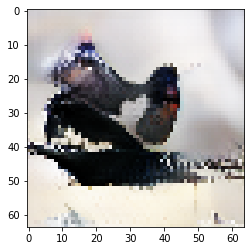

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 48

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 37.495094537734985 sec
Gen loss: 5.562971011732975, Gen valid loss: 1.3999048868815105, Gen attr loss: 4.163066140358364, Disc valid loss: 1.0424692696995206, Disc valid real loss: 0.5360054555462628, Disc valid fake loss: 0.5064638147993785, Disc attr loss: 7.664165485195998, Disc attr real loss: 3.501099344837633, Disc attr fake loss: 4.163066140358364
Time for epoch 2 is 37.81999945640564 sec
Gen loss: 5.5079983592356445, Gen valid loss: 1.398963404218679, Gen attr loss: 4.109034953724724, Disc valid loss: 1.042703283349996, Disc valid real loss: 0.5318104405874805, Disc valid fake loss: 0.5108928417125691, Disc attr loss: 7.611794584165744, Disc attr real loss: 3.5027596304410196, Disc attr fake loss: 4.109034953724724
Time for epoch 3 is 37.76404309272766 sec
Gen loss: 5.509644348123856, Gen valid loss: 1.384828036070516, Gen attr loss: 4.1248163

Time for epoch 23 is 37.80537986755371 sec
Gen loss: 5.525756547767618, Gen valid loss: 1.396907441015166, Gen attr loss: 4.128849107075513, Disc valid loss: 1.0542335797777667, Disc valid real loss: 0.5399326851697472, Disc valid fake loss: 0.5143008935580732, Disc attr loss: 7.626282166659347, Disc attr real loss: 3.4974330595838343, Disc attr fake loss: 4.128849107075513
Time for epoch 24 is 37.89526605606079 sec
Gen loss: 5.476263489503524, Gen valid loss: 1.3878348435812848, Gen attr loss: 4.088428645276119, Disc valid loss: 1.0440158582315213, Disc valid real loss: 0.5338435393523394, Disc valid fake loss: 0.5101723208983093, Disc attr loss: 7.586229960769819, Disc attr real loss: 3.4978013154937, Disc attr fake loss: 4.088428645276119
Time for epoch 25 is 37.822041034698486 sec
Gen loss: 5.5276129859572825, Gen valid loss: 1.4108876480965757, Gen attr loss: 4.1167253485217, Disc valid loss: 1.0354597872188744, Disc valid real loss: 0.5277688846517061, Disc valid fake loss: 0.507

Time for epoch 45 is 37.82092595100403 sec
Gen loss: 5.553726511596018, Gen valid loss: 1.4080661292967758, Gen attr loss: 4.1456603810070005, Disc valid loss: 1.0387528616238415, Disc valid real loss: 0.5281344965544497, Disc valid fake loss: 0.5106183646655664, Disc attr loss: 7.639025018144106, Disc attr real loss: 3.4933646371371054, Disc attr fake loss: 4.1456603810070005
Time for epoch 46 is 37.872347831726074 sec
Gen loss: 5.517591697413747, Gen valid loss: 1.393343920630168, Gen attr loss: 4.124247777106639, Disc valid loss: 1.0489310961428697, Disc valid real loss: 0.5342172249384366, Disc valid fake loss: 0.5147138720120841, Disc attr loss: 7.616835250440975, Disc attr real loss: 3.4925874733343356, Disc attr fake loss: 4.124247777106639
Time for epoch 47 is 37.823734283447266 sec
Gen loss: 5.472953924318639, Gen valid loss: 1.3868176799802598, Gen attr loss: 4.086136244176849, Disc valid loss: 1.04490175576714, Disc valid real loss: 0.5311815530304017, Disc valid fake loss: 

Time for epoch 67 is 37.81959414482117 sec
Gen loss: 5.518812854115556, Gen valid loss: 1.4036227639128522, Gen attr loss: 4.115190086002919, Disc valid loss: 1.035603338786903, Disc valid real loss: 0.5288501155731801, Disc valid fake loss: 0.5067532217599512, Disc attr loss: 7.606060834434944, Disc attr real loss: 3.490870748432025, Disc attr fake loss: 4.115190086002919
Time for epoch 68 is 37.866753578186035 sec
Gen loss: 5.507788566392935, Gen valid loss: 1.415312623105398, Gen attr loss: 4.0924759518486375, Disc valid loss: 1.037401907650759, Disc valid real loss: 0.5299535673162156, Disc valid fake loss: 0.5074483396884225, Disc attr loss: 7.580458966697135, Disc attr real loss: 3.4879830148484974, Disc attr fake loss: 4.0924759518486375
Time for epoch 69 is 37.836294412612915 sec
Gen loss: 5.5323078328677955, Gen valid loss: 1.41763170560201, Gen attr loss: 4.114676119512335, Disc valid loss: 1.0360871107597662, Disc valid real loss: 0.5279106191664853, Disc valid fake loss: 0.

Time for epoch 89 is 37.83647608757019 sec
Gen loss: 5.510384430407186, Gen valid loss: 1.384962681509292, Gen attr loss: 4.1254217450211685, Disc valid loss: 1.0478965631991544, Disc valid real loss: 0.5372645335630349, Disc valid fake loss: 0.5106320303630053, Disc attr loss: 7.610307060283051, Disc attr real loss: 3.484885315261882, Disc attr fake loss: 4.1254217450211685
Time for epoch 90 is 37.84905934333801 sec
Gen loss: 5.480610051452306, Gen valid loss: 1.3888387502370487, Gen attr loss: 4.0917712886159014, Disc valid loss: 1.0434568897495424, Disc valid real loss: 0.5323163562512333, Disc valid fake loss: 0.5111405323675977, Disc attr loss: 7.575175714363573, Disc attr real loss: 3.4834044257476724, Disc attr fake loss: 4.0917712886159014
Time for epoch 91 is 37.81781458854675 sec
Gen loss: 5.490363214074112, Gen valid loss: 1.4067165741752479, Gen attr loss: 4.083646634729897, Disc valid loss: 1.0415623199325914, Disc valid real loss: 0.5322919647868086, Disc valid fake loss:

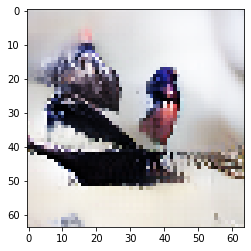

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 49

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 37.78203344345093 sec
Gen loss: 5.497251133285564, Gen valid loss: 1.3927334017223783, Gen attr loss: 4.104517725425038, Disc valid loss: 1.0467169281589952, Disc valid real loss: 0.5339093556410575, Disc valid fake loss: 0.5128075723564075, Disc attr loss: 7.583095746311715, Disc attr real loss: 3.478578020886677, Disc attr fake loss: 4.104517725425038
Time for epoch 2 is 37.754122734069824 sec
Gen loss: 5.57155013407472, Gen valid loss: 1.4085065384867392, Gen attr loss: 4.163043597203283, Disc valid loss: 1.0383451936367727, Disc valid real loss: 0.5300857443311996, Disc valid fake loss: 0.5082594498709289, Disc attr loss: 7.6446333131816, Disc attr real loss: 3.4815897159783176, Disc attr fake loss: 4.163043597203283
Time for epoch 3 is 37.796666383743286 sec
Gen loss: 5.509617329936041, Gen valid loss: 1.3914646112175815, Gen attr loss: 4.1181527

Time for epoch 23 is 37.78140377998352 sec
Gen loss: 5.502038543463399, Gen valid loss: 1.411641354967908, Gen attr loss: 4.090397173796243, Disc valid loss: 1.044637904903753, Disc valid real loss: 0.5355234033047023, Disc valid fake loss: 0.5091145008721649, Disc attr loss: 7.569822987243735, Disc attr real loss: 3.479425813447492, Disc attr fake loss: 4.090397173796243
Time for epoch 24 is 37.75759172439575 sec
Gen loss: 5.477687906766649, Gen valid loss: 1.389394241942946, Gen attr loss: 4.088293649962924, Disc valid loss: 1.0421558251871972, Disc valid real loss: 0.5319504628013466, Disc valid fake loss: 0.5102053645665083, Disc attr loss: 7.565083172909289, Disc attr real loss: 3.4767895229463655, Disc attr fake loss: 4.088293649962924
Time for epoch 25 is 37.84429979324341 sec
Gen loss: 5.49899250898904, Gen valid loss: 1.4046327147057387, Gen attr loss: 4.094359799129207, Disc valid loss: 1.034359023338411, Disc valid real loss: 0.5242486910283727, Disc valid fake loss: 0.51011

Time for epoch 45 is 37.785508155822754 sec
Gen loss: 5.470967415548598, Gen valid loss: 1.4029851253762802, Gen attr loss: 4.067982296956587, Disc valid loss: 1.0373629593267673, Disc valid real loss: 0.5308048162195418, Disc valid fake loss: 0.5065581434302859, Disc attr loss: 7.539700922281115, Disc attr real loss: 3.4717186253245282, Disc attr fake loss: 4.067982296956587
Time for epoch 46 is 37.807186126708984 sec
Gen loss: 5.492372698900176, Gen valid loss: 1.3930220374569984, Gen attr loss: 4.099350682442104, Disc valid loss: 1.0459482713443478, Disc valid real loss: 0.533082300569953, Disc valid fake loss: 0.5128659712589854, Disc attr loss: 7.570802187855005, Disc attr real loss: 3.4714515054129005, Disc attr fake loss: 4.099350682442104
Time for epoch 47 is 37.78974533081055 sec
Gen loss: 5.486573428642459, Gen valid loss: 1.3889347557129899, Gen attr loss: 4.097638669052745, Disc valid loss: 1.0481442486044514, Disc valid real loss: 0.5351193900999984, Disc valid fake loss: 

Time for epoch 67 is 37.78225493431091 sec
Gen loss: 5.528288992439828, Gen valid loss: 1.4070481834049793, Gen attr loss: 4.121240798696916, Disc valid loss: 1.0370632574810246, Disc valid real loss: 0.5297009802769194, Disc valid fake loss: 0.5073622779309911, Disc attr loss: 7.591587349651306, Disc attr real loss: 3.47034655095439, Disc attr fake loss: 4.121240798696916
Time for epoch 68 is 37.781243324279785 sec
Gen loss: 5.505563321152354, Gen valid loss: 1.3903174154803681, Gen attr loss: 4.115245908256469, Disc valid loss: 1.0535195968984588, Disc valid real loss: 0.540259977585578, Disc valid fake loss: 0.5132596177783438, Disc attr loss: 7.586563824315058, Disc attr real loss: 3.4713179160585894, Disc attr fake loss: 4.115245908256469
Time for epoch 69 is 37.7660231590271 sec
Gen loss: 5.468493426718363, Gen valid loss: 1.3886514566132047, Gen attr loss: 4.0798419600902855, Disc valid loss: 1.0477999075641478, Disc valid real loss: 0.5336929298836365, Disc valid fake loss: 0.5

Time for epoch 89 is 37.78305172920227 sec
Gen loss: 5.494527881384542, Gen valid loss: 1.3914273864208522, Gen attr loss: 4.103100480102912, Disc valid loss: 1.0439245991590547, Disc valid real loss: 0.5335967304906871, Disc valid fake loss: 0.5103278671338306, Disc attr loss: 7.567814724878244, Disc attr real loss: 3.4647142447753327, Disc attr fake loss: 4.103100480102912
Time for epoch 90 is 37.7933874130249 sec
Gen loss: 5.503930682412331, Gen valid loss: 1.405895173388122, Gen attr loss: 4.0980354977170945, Disc valid loss: 1.0369371409984784, Disc valid real loss: 0.5273736566708986, Disc valid fake loss: 0.5095634822276872, Disc attr loss: 7.562286032570733, Disc attr real loss: 3.464250534853638, Disc attr fake loss: 4.0980354977170945
Time for epoch 91 is 37.76488924026489 sec
Gen loss: 5.491188579135471, Gen valid loss: 1.400887243308349, Gen attr loss: 4.0903013321119275, Disc valid loss: 1.0445098064456206, Disc valid real loss: 0.5335728862098239, Disc valid fake loss: 0.

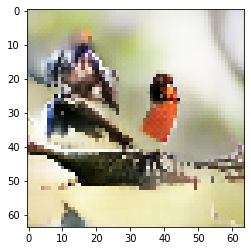

In [209]:
next_starting_checkpoint, totalepochs, warmup = long_train(starting_checkpoint=next_starting_checkpoint, 
                                      num_checkpoints=20, 
                                      checkpoint_interval=100, 
                                      g_hist=gen_loss_hist, 
                                      g_valid_hist=gen_valid_loss_hist,
                                      g_attr_hist=gen_attr_loss_hist,
                                      d_hist=disc_loss_hist,
                                      d_real_hist=disc_loss_real_hist,
                                      d_fake_hist=disc_loss_fake_hist,
                                      d_attr_real_hist=disc_attr_loss_real_hist,
                                      d_attr_fake_hist=disc_attr_loss_fake_hist,
                                      noise=noise300,
                                      caption=caption,
                                      save_files=True,
                                      warmup=warmup)

In [27]:
generator.load_weights('./results/weights/bird-gan-attributes-split-captions-concat/gen_weights_attributes_split_5000.h5')
discriminator_valid.load_weights ('./results/weights/bird-gan-attributes-split-captions-concat/disc_weights_attributes_split_valid_5000.h5')
discriminator_attr.load_weights('./results/weights/bird-gan-attributes-split-captions-concat/disc_weights_attributes_split_attr_5000.h5')

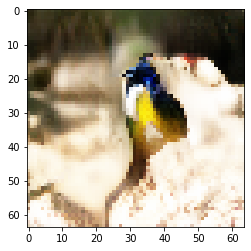

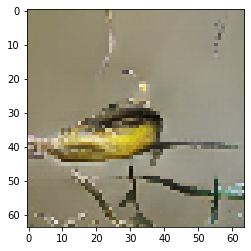

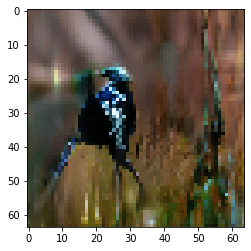

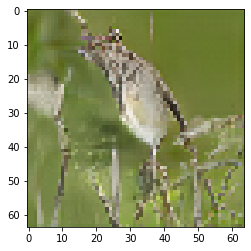

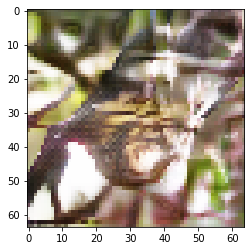

In [41]:
captions = train_captions[np.random.choice(range(len(train_captions)), 5, replace=False)]
# attrs = [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]
# tempnoise = np.random.normal(0, 1, 300)
for i in range(5):
    tempnoise = np.random.normal(0, 1, 300)

    
#     attrs[2] += 1.
    
    generated_image = generator.predict([np.array([tempnoise]), np.array([1.*captions[i]])] )[0]
    plt.imshow(unnormalize_img(generated_image))
    plt.show()
#     ax.imshow(unnormalize_img(generated_image))

In [ ]:
# noise = np.random.normal(0, 1, 300)
for i in range(15):
    attrs = [0. for _ in range(34)]
#     attrs = np.round(np.random.uniform(0, 1, 10)) * 3
#     attrs[5] -= 1
    attrs[i] += 20
    generated_image = generator.predict([np.array([tempnoise]), np.array([attrs])] )[0]
    plt.imshow(unnormalize_img(generated_image))
    plt.title(str(attrs))
    plt.show()
#     ax.imshow(unnormalize_img(generated_image))

In [ ]:
from mpl_toolkits.axes_grid1 import ImageGrid

fig = plt.figure(figsize=(10., 10.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(3, 3),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

attrs = train_attrs[np.random.choice(range(len(train_attrs)), 9, replace=False)]
tempnoise = np.random.normal(0, 1, 300)
for i, ax in enumerate(grid):
    generated_image = generator.predict([np.array([tempnoise]), np.array([attrs[i]])] )[0]
    ax.imshow(unnormalize_img(generated_image))

In [ ]:
from mpl_toolkits.axes_grid1 import ImageGrid

fig = plt.figure(figsize=(10., 10.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(5, 5),
                 axes_pad=0.1,  # pad between axes in inch.
                 )
attrs[20:] = 0.
for i, ax in enumerate(grid):
#     attrs = [0. for _ in range(34)]
    x = i % 5
    y = (i // 5) % 5
    attrs[21] = (3.*x)
    attrs[27] = (3.*y)
    generated_image = generator.predict([np.array([tempnoise]), np.array([attrs])] )[0]
    ax.imshow(unnormalize_img(generated_image))

In [ ]:
from mpl_toolkits.axes_grid1 import ImageGrid

fig = plt.figure(figsize=(10., 10.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(5, 5),
                 axes_pad=0.1,  # pad between axes in inch.
                 )
attrs[20:] = 0.
for i, ax in enumerate(grid):
#     attrs = [0. for _ in range(34)]
    x = i % 5
    y = (i // 5) % 5
    attrs[21] = (3.*x)
    attrs[27] = (3.*y)
    generated_image = generator.predict([np.array([tempnoise]), np.array([attrs])] )[0]
    ax.imshow(unnormalize_img(generated_image))

In [ ]:
from mpl_toolkits.axes_grid1 import ImageGrid

fig = plt.figure(figsize=(10., 10.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(5, 5),
                 axes_pad=0.1,  # pad between axes in inch.
                 )

attrs = train_attrs[np.random.choice(range(len(train_attrs)), 9, replace=False)]
for i, ax in enumerate(grid):
    attrs = [0. for _ in range(34)]
    x = i % 5
    y = (i // 5) % 5
    attrs[11] = (4*x)
    attrs[12] = (10*y)
    generated_image = generator.predict([np.array([tempnoise]), np.array([attrs])] )[0]
    ax.imshow(unnormalize_img(generated_image))

In [ ]:
from mpl_toolkits.axes_grid1 import ImageGrid

fig = plt.figure(figsize=(10., 10.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(5, 5),
                 axes_pad=0.1,  # pad between axes in inch.
                 )

attrs = train_attrs[np.random.choice(range(len(train_attrs)), 9, replace=False)]
for i, ax in enumerate(grid):
    attrs = [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]
    x = i % 5
    y = (i // 5) % 5
    attrs[2] = (x)
    attrs[4] = (y)
    generated_image = generator.predict([np.array([tempnoise]), np.array([attrs])] )[0]
    ax.imshow(unnormalize_img(generated_image))

In [ ]:
savednoise = tempnoise.copy()
# tempnoise = savednoise.copy()

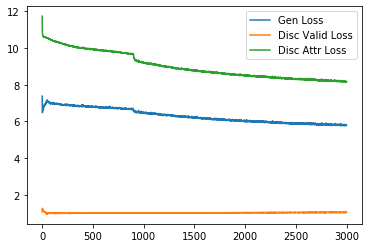

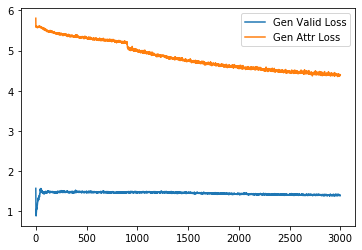

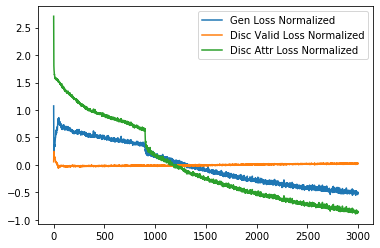

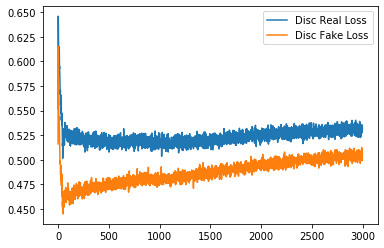

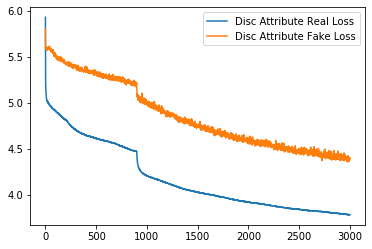

In [163]:
plot_save_dir = 'bird-gan-attributes-split-captions-concat'

from operator import add
disc_attr_loss_hist = list( map(add, disc_attr_loss_real_hist, disc_attr_loss_fake_hist) )

plt.plot(gen_loss_hist)
plt.plot(disc_loss_hist)
plt.plot(disc_attr_loss_hist)

plt.legend(['Gen Loss','Disc Valid Loss', 'Disc Attr Loss'])
plt.savefig('./results/plots/'+plot_save_dir+'/g_d_losses.png')
plt.show()

plt.plot(gen_valid_loss_hist)
plt.plot(gen_attr_loss_hist)
plt.legend(['Gen Valid Loss', 'Gen Attr Loss'])
plt.savefig('./results/plots/'+plot_save_dir+'/g_valid_attr_losses.png')
plt.show()

plt.plot(gen_loss_hist - np.mean(gen_loss_hist))
plt.plot(disc_loss_hist - np.mean(disc_loss_hist))
plt.plot(disc_attr_loss_hist - np.mean(disc_attr_loss_hist))
plt.legend(['Gen Loss Normalized','Disc Valid Loss Normalized', 'Disc Attr Loss Normalized'])
plt.savefig('./results/plots/'+plot_save_dir+'/g_d_losses_normalized.png')
plt.show()

plt.plot(disc_loss_real_hist)
plt.plot(disc_loss_fake_hist)
plt.legend(['Disc Real Loss','Disc Fake Loss'])
plt.savefig('./results/plots/'+plot_save_dir+'/d_real_fake_losses.png')
plt.show()

plt.plot(disc_attr_loss_real_hist)
# plt.show()
plt.plot(disc_attr_loss_fake_hist)
plt.legend(['Disc Attribute Real Loss', 'Disc Attribute Fake Loss'])
plt.savefig('./results/plots/'+plot_save_dir+'/d_attribute_real_fake_losses.png')
plt.show()


In [ ]:
prediction = discriminator_attr.predict(np.array([train_imgs[6]]))[0]
print(np.where(np.round(prediction) == 1))

In [ ]:
prediction = discriminator_attr.predict(np.array([train_imgs[344]]))[0]
print(np.where(np.round(prediction) == 1))

In [ ]:
d = dict.fromkeys([i for i in range(10)], 0)
prediction = discriminator_attr.predict(np.array(train_imgs))
prediction = np.round(prediction)
for p in prediction:
    p = np.where(p == 1)
    for i in p[0]:
        d[i] += 1
    
# for im in train_imgs:
#     for p in prediction[0]:
#         d[p] += 1

In [ ]:
plt.bar([x for x in range(10)], d.values())

In [ ]:
plt.bar([x for x in range(10)], np.sum(train_attrs, axis=0))

In [ ]:
train_captions[0]

In [165]:
from bert_serving.client import BertClient
bc = BertClient()

In [180]:
testcaption = bc.encode(['red bird.'])